# Import Required Libraries
Import necessary libraries such as pandas, numpy, seaborn, and matplotlib.

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import json
import random
from typing import List, Tuple
from datetime import datetime, timedelta

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# System
import os

# Set seaborn style for better visualization
sns.set(style="whitegrid")

# Load the Dataset
Load the dataset from the CSV file using pandas.

In [2]:

# Load the datasets from the CSV and Excel files using pandas
file_paths = [
    r'C:\Users\MSI\OneDrive - ESPRIT\Bureau\4DS ESPRIT\SEM2\PI PROJECT\Scrap Datasets\Clubs Datasets\Soccer_Football Clubs Ranking in june.csv',
    r'C:\Users\MSI\OneDrive - ESPRIT\Bureau\4DS ESPRIT\SEM2\PI PROJECT\Scrap Datasets\Clubs Datasets\2013 national-football-clubs.xlsx',
    r'C:\Users\MSI\OneDrive - ESPRIT\Bureau\4DS ESPRIT\SEM2\PI PROJECT\Scrap Datasets\Clubs Datasets\2014 Kenya football club.xlsx',
    r'C:\Users\MSI\OneDrive - ESPRIT\Bureau\4DS ESPRIT\SEM2\PI PROJECT\Scrap Datasets\Clubs Datasets\2015 Football clubs KE.xlsx'
]

# Load CSV file
df_csv = pd.read_csv(file_paths[0])

# Load Excel files
df_excel1 = pd.read_excel(file_paths[1])
df_excel2 = pd.read_excel(file_paths[2])
df_excel3 = pd.read_excel(file_paths[3])

# Concatenate all dataframes into a single dataframe
df = pd.concat([df_csv, df_excel1, df_excel2, df_excel3], ignore_index=True)
# Clean column names
df.columns = df.columns.str.replace(r'[\r\n]+', '', regex=True)


# Display the first few rows of the dataset to verify loading
df.head()

,ranking,club name,country,point score,1 year change,previous point scored,symbol change,2013 Kenya Premier League,2013 National Division One,2013 unknown,Kenyan Premier League (1. League),National Super League (2. League),National Division One (3. League),unkown,2015 Kenyan Premier League,2015 New Division,2015 Nairobi Super League,2015 FKF Premier League,2015 FISA Nairobi
0,65.0,1. FC Köln,Germany,1668.0,160.0,1529.0,+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,1. FC Union Berlin,Germany,1748.0,32.0,1665.0,+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,967.0,12 de Octubre de Itaugua,Paraguay,1352.0,270.0,1390.0,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,265.0,1º de Agosto,Angola,1512.0,11.0,1518.0,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2530.0,1º de Maio,Angola,1218.0,24.0,1218.0,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Filter African Clubs
Filter the datasets to include only African football clubs.

In [3]:
# List of African countries
african_countries = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", 
    "Cameroon", "Central African Republic", "Chad", "Comoros", "Democratic Republic of the Congo", 
    "Republic of the Congo", "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", 
    "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Ivory Coast", "Kenya", 
    "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", 
    "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "São Tomé and Príncipe", 
    "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Sudan", 
    "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"
]


# Filter the datasets to include only African clubs
df_africa = df[df['country'].isin(african_countries)]


# Display the first few rows of the filtered dataset to verify
df_africa.head()

,ranking,club name,country,point score,1 year change,previous point scored,symbol change,2013 Kenya Premier League,2013 National Division One,2013 unknown,Kenyan Premier League (1. League),National Super League (2. League),National Division One (3. League),unkown,2015 Kenyan Premier League,2015 New Division,2015 Nairobi Super League,2015 FKF Premier League,2015 FISA Nairobi
3,265.0,1º de Agosto,Angola,1512.0,11.0,1518.0,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2530.0,1º de Maio,Angola,1218.0,24.0,1218.0,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,945.0,Abia Warriors,Nigeria,1354.0,151.0,1372.0,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2267.0,AC Mamahira,Mali,1241.0,37.0,1241.0,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,1128.0,Academia F. Amadou Diallo,Ivory Coast,1332.0,256.0,1362.0,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Handle Missing Values
Identify and handle missing values in the dataset.

Missing values in each column:
 ranking                                0
club name                              0
country                                0
point score                            0
1 year change                          0
previous point scored                  0
symbol change                          0
2013 Kenya Premier League            511
2013 National Division One           511
2013 unknown                         511
Kenyan Premier League (1. League)    511
National Super League (2. League)    511
National Division One (3. League)    511
unkown                               511
2015 Kenyan Premier League           511
2015 New Division                    511
2015 Nairobi Super League            511
2015 FKF Premier League              511
2015 FISA Nairobi                    511
dtype: int64
ranking                                0
club name                              0
country                                0
point score                            0
1 year chang

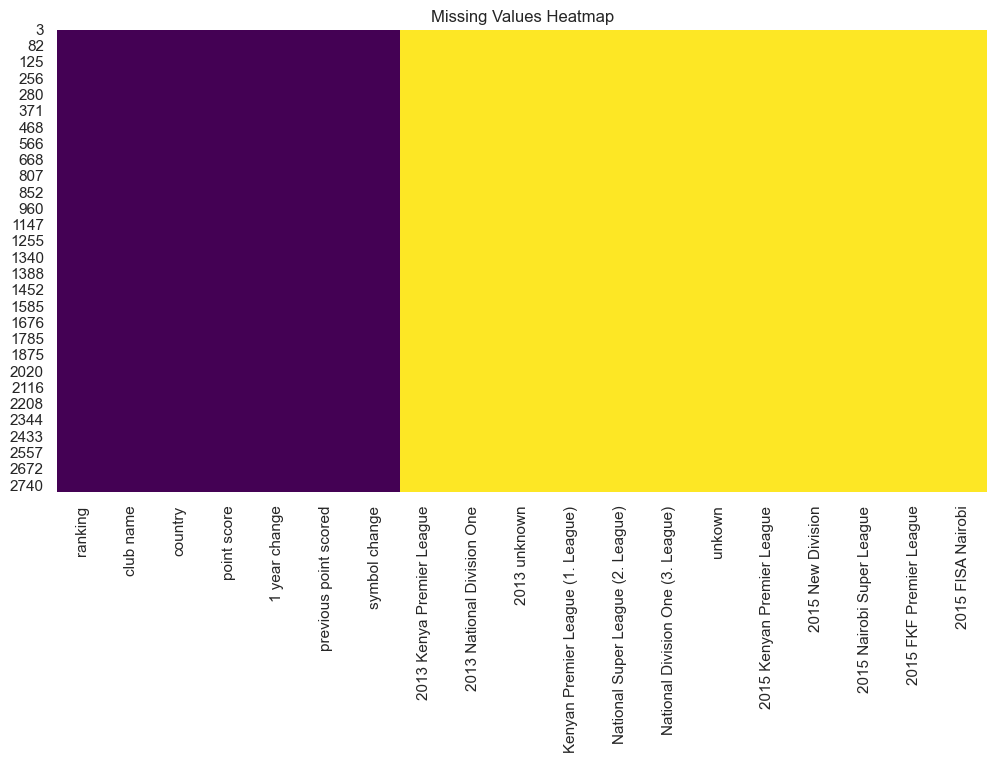

Columns after dropping those with 100% missing values:
 Index(['ranking', 'club name', 'country', 'point score', '1 year change',
       'previous point scored', 'symbol change'],
      dtype='object')


,ranking,club name,country,point score,1 year change,previous point scored,symbol change
3,265.0,1º de Agosto,Angola,1512.0,11.0,1518.0,-
4,2530.0,1º de Maio,Angola,1218.0,24.0,1218.0,-
13,945.0,Abia Warriors,Nigeria,1354.0,151.0,1372.0,-
19,2267.0,AC Mamahira,Mali,1241.0,37.0,1241.0,-
24,1128.0,Academia F. Amadou Diallo,Ivory Coast,1332.0,256.0,1362.0,-


In [4]:
# Handle Missing Values

# Check for missing values in the dataset
missing_values = df_africa.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Check the number of missing values in each column
missing_values = df_africa.isnull().sum()
print(missing_values)

# Check the percentage of missing values in each column
missing_percentage = df_africa.isnull().mean() * 100
print(missing_percentage)

# Visualize missing values using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_africa.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Handle missing values
# Option 1: Drop rows with missing values
# Drop columns with 100% missing values
df_africa_cleaned = df_africa.dropna(axis=1, how='all')

# Verify the columns have been dropped
print("Columns after dropping those with 100% missing values:\n", df_africa_cleaned.columns)


# Display the first few rows of the cleaned dataset to verify
df_africa_cleaned.head()



# Data Cleaning
Perform data cleaning steps such as removing duplicates, correcting data types, and handling outliers.

Number of duplicate rows: 0
Data types before correction:
 ranking                              float64
club name                             object
country                               object
point score                          float64
1 year change                        float64
previous point scored                float64
symbol change                         object
2013 Kenya Premier League             object
2013 National Division One            object
2013 unknown                          object
Kenyan Premier League (1. League)     object
National Super League (2. League)    float64
National Division One (3. League)    float64
unkown                               float64
2015 Kenyan Premier League            object
2015 New Division                     object
2015 Nairobi Super League             object
2015 FKF Premier League              float64
2015 FISA Nairobi                     object
dtype: object
Data types after correction:
 ranking                                int

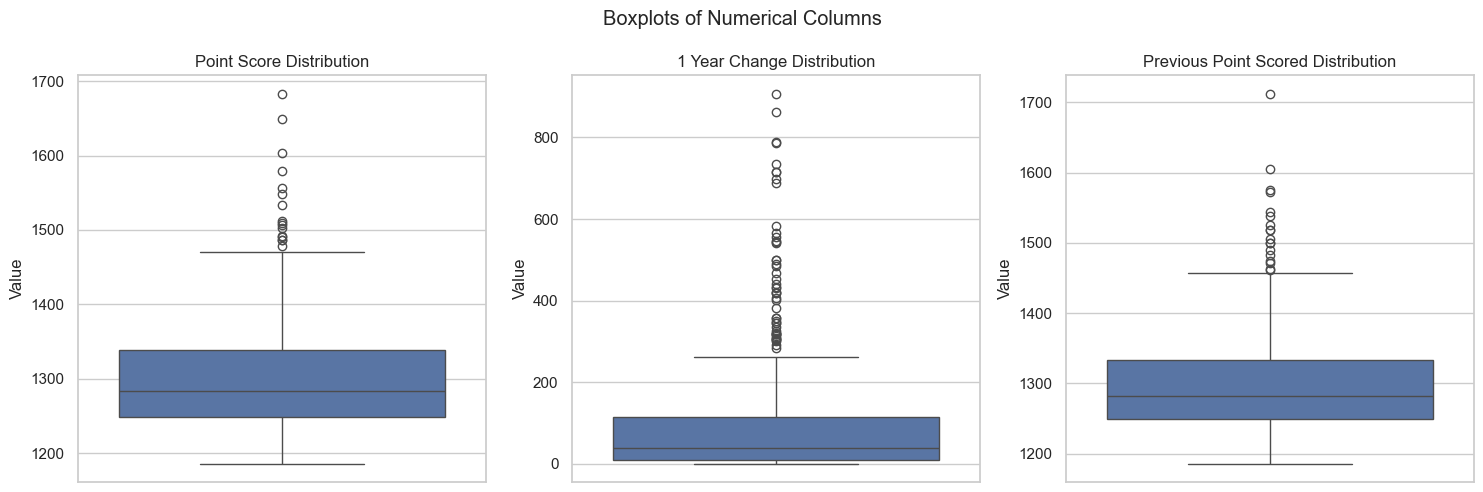


Outliers in point score:
3       1512.0
92      1683.0
112     1510.0
170     1486.0
315     1492.0
652     1533.0
673     1478.0
820     1507.0
851     1557.0
879     1579.0
893     1503.0
1610    1604.0
2047    1487.0
2095    1548.0
2408    1490.0
2713    1649.0
Name: point score, dtype: float64

Outliers in 1 year change:
29      421.0
119     305.0
284     318.0
291     452.0
292     350.0
371     318.0
381     335.0
486     291.0
500     430.0
633     284.0
829     419.0
852     541.0
859     499.0
1033    715.0
1120    545.0
1147    321.0
1182    419.0
1216    306.0
1251    358.0
1255    356.0
1384    735.0
1504    584.0
1600    345.0
1614    304.0
1665    324.0
1676    787.0
1714    382.0
1737    484.0
1766    689.0
1770    698.0
1856    309.0
1877    441.0
1922    401.0
2027    406.0
2086    544.0
2090    432.0
2091    715.0
2093    862.0
2118    499.0
2122    790.0
2123    319.0
2157    490.0
2240    314.0
2379    556.0
2419    467.0
2432    344.0
2557    300.0
2590    565.0


In [5]:

# Data Cleaning
def clean_data(df):
    # Remove Duplicates
    duplicate_rows = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate_rows}")
    df_cleaned = df.drop_duplicates()

    # Correct Data Types
    print("Data types before correction:\n", df_cleaned.dtypes)
    
    # Convert columns to appropriate data types
    type_conversions = {
        'ranking': 'int',
        'point score': 'float',
        '1 year change': 'float',
        'previous point scored': 'float'
    }
    
    for col, dtype in type_conversions.items():
        df_cleaned[col] = df_cleaned[col].astype(dtype)
    
    print("Data types after correction:\n", df_cleaned.dtypes)
    return df_cleaned

def visualize_distributions(df):
    # Create subplots for each numerical column
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Boxplots of Numerical Columns')
    
    numerical_columns = ['point score', '1 year change', 'previous point scored']
    titles = ['Point Score Distribution', '1 Year Change Distribution', 'Previous Point Scored Distribution']
    
    for i, (col, title) in enumerate(zip(numerical_columns, titles)):
        sns.boxplot(data=df, y=col, ax=axes[i])
        axes[i].set_title(title)
        axes[i].set_ylabel('Value')
        print(f"\n{title} Summary:")
        print(df[col].describe())
    
    plt.tight_layout()
    plt.show()

def handle_outliers(df):
    def get_outliers(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return column[(column < lower_bound) | (column > upper_bound)]
    
    numerical_columns = ['point score', '1 year change', 'previous point scored']
    
    # Print outliers for each column
    for col in numerical_columns:
        print(f"\nOutliers in {col}:")
        print(get_outliers(df[col]))
    
    # Remove outliers using IQR method
    Q1 = df[numerical_columns].quantile(0.25)
    Q3 = df[numerical_columns].quantile(0.75)
    IQR = Q3 - Q1
    
    df_no_outliers = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | 
                         (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    return df_no_outliers

# Main execution
df_africa_cleaned = clean_data(df_africa)
visualize_distributions(df_africa_cleaned)
df_africa_final = handle_outliers(df_africa_cleaned)

# Display the first few rows of the final cleaned dataset
print("\nFinal cleaned dataset:")
print(df_africa_final.head())

# Correlation Analysis
Perform correlation analysis to understand relationships between different variables.

Correlation Matrix:
                        ranking  point score  1 year change  \
ranking                1.000000    -0.950447      -0.057326   
point score           -0.950447     1.000000       0.021941   
1 year change         -0.057326     0.021941       1.000000   
previous point scored -0.918612     0.966998       0.043144   

                       previous point scored  
ranking                            -0.918612  
point score                         0.966998  
1 year change                       0.043144  
previous point scored               1.000000  


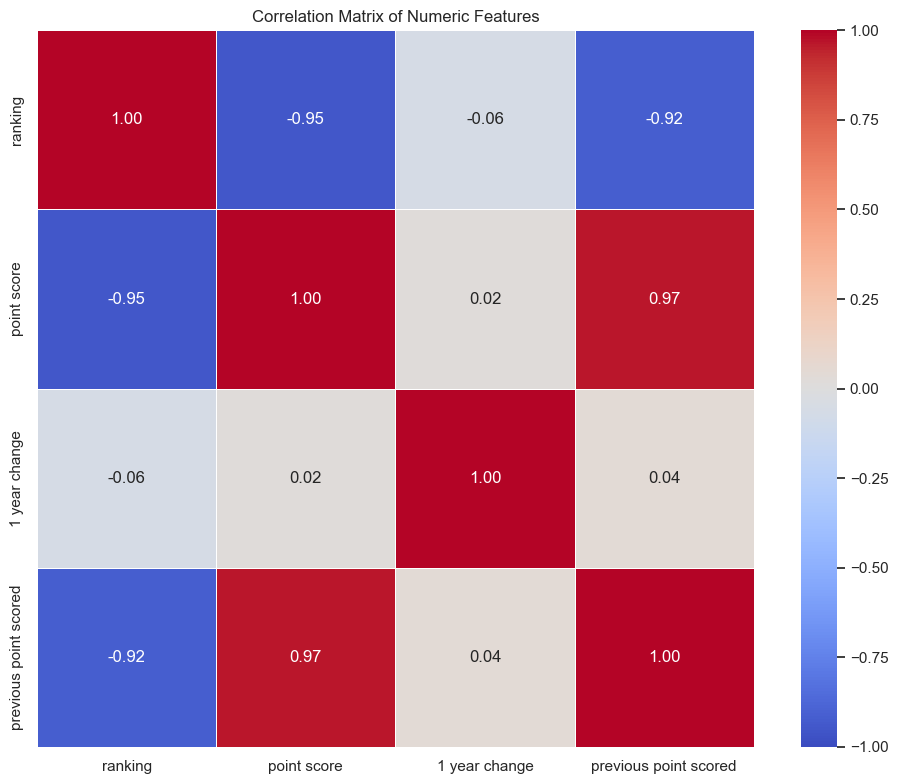


Highly Correlated Features (threshold > 0.75):
                        ranking  point score  previous point scored
ranking                     NaN    -0.950447              -0.918612
point score           -0.950447          NaN               0.966998
previous point scored -0.918612     0.966998                    NaN


In [6]:
# Select only numeric columns for correlation analysis
numeric_columns = ['ranking', 'point score', '1 year change', 'previous point scored']
numeric_df = df_africa_cleaned[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  # Show numbers
            cmap='coolwarm',  # Color scheme
            vmin=-1, vmax=1,  # Set scale
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Format numbers to 2 decimal places
            square=True,  # Make the plot square-shaped
            linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# Identify highly correlated features
threshold = 0.75
high_corr = correlation_matrix.where(
    (correlation_matrix.abs() > threshold) & 
    (correlation_matrix != 1.0)
).dropna(how='all', axis=0).dropna(how='all', axis=1)

if not high_corr.empty:
    print("\nHighly Correlated Features (threshold > 0.75):")
    print(high_corr)

# Scatter plots
Perform scatter plots analysis to understand relationships between  variables.

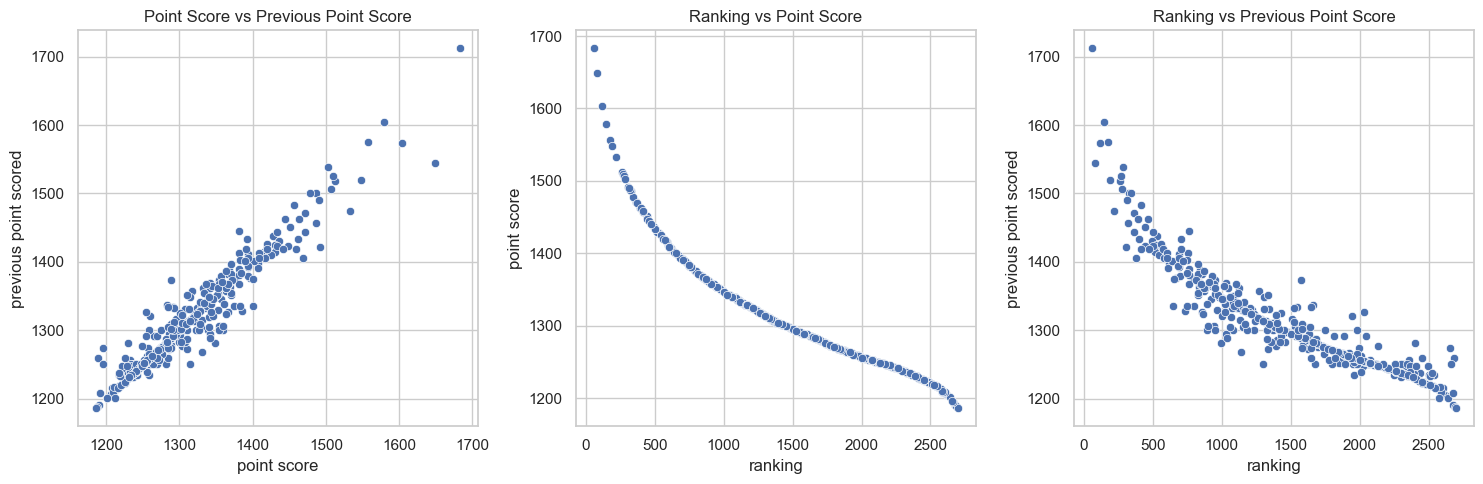

In [7]:

# Create scatter plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Point Score vs Previous Point Score
sns.scatterplot(data=df_africa_cleaned, 
                x='point score', 
                y='previous point scored',
                ax=axes[0])
axes[0].set_title('Point Score vs Previous Point Score')

# Ranking vs Point Score
sns.scatterplot(data=df_africa_cleaned,
                x='ranking',
                y='point score',
                ax=axes[1])
axes[1].set_title('Ranking vs Point Score')

# Ranking vs Previous Point Score
sns.scatterplot(data=df_africa_cleaned,
                x='ranking',
                y='previous point scored',
                ax=axes[2])
axes[2].set_title('Ranking vs Previous Point Score')

plt.tight_layout()
plt.show()

# Comparison Visualization
Point score vs previous point score with ranking.

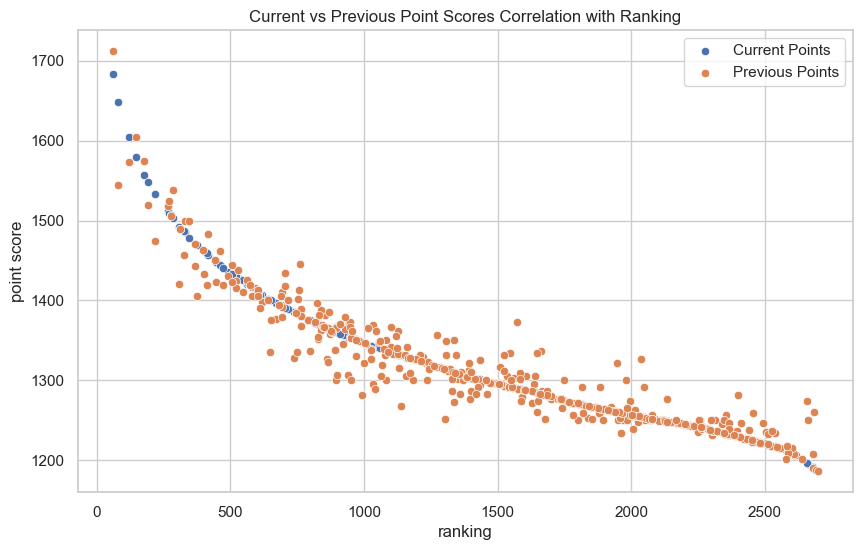

Current Point Score correlation with ranking: -0.950
Previous Point Score correlation with ranking: -0.919
Correlation coefficient: 0.967

Statistical Summary of Differences:
count    511.000000
mean      -0.234834
std       18.782544
min      -84.000000
25%       -1.000000
50%        0.000000
75%        0.000000
max      105.000000
dtype: float64


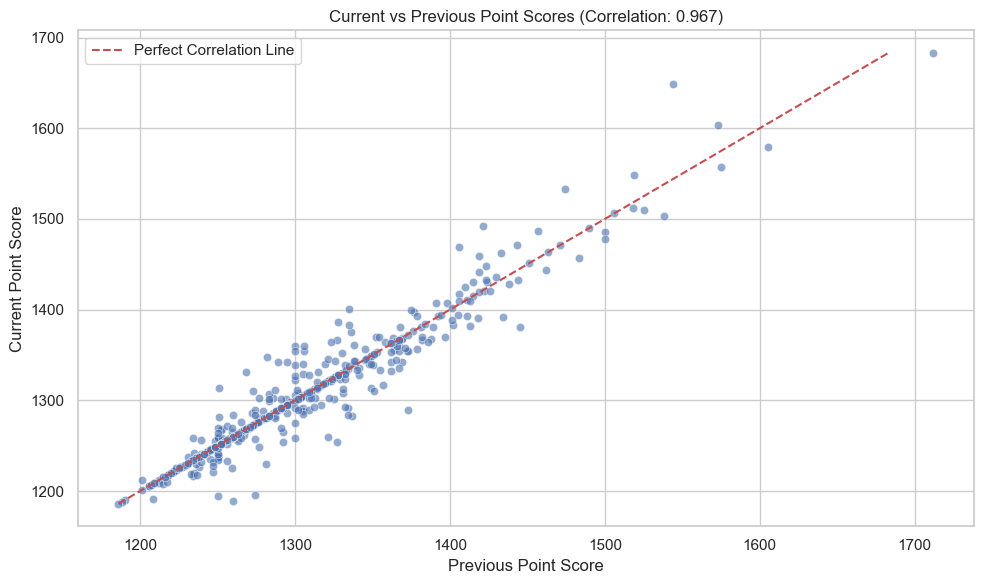

In [8]:

# Compare correlations
def compare_features(df):
    # Calculate correlations
    point_score_corr = df['point score'].corr(df['ranking'])
    prev_score_corr = df['previous point scored'].corr(df['ranking'])
    
    # Visualize comparison
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='ranking', y='point score', label='Current Points')
    sns.scatterplot(data=df, x='ranking', y='previous point scored', label='Previous Points')
    plt.title('Current vs Previous Point Scores Correlation with Ranking')
    plt.legend()
    plt.show()
    
    print(f"Current Point Score correlation with ranking: {point_score_corr:.3f}")
    print(f"Previous Point Score correlation with ranking: {prev_score_corr:.3f}")

compare_features(df_africa_cleaned)



def analyze_point_scores(df):
    # Calculate correlation
    correlation = df['point score'].corr(df['previous point scored'])
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, 
                    x='previous point scored', 
                    y='point score',
                    alpha=0.6)
    
    # Add reference line (y=x)
    plt.plot([df['point score'].min(), df['point score'].max()], 
             [df['point score'].min(), df['point score'].max()], 
             'r--', label='Perfect Correlation Line')
    
    plt.title(f'Current vs Previous Point Scores (Correlation: {correlation:.3f})')
    plt.xlabel('Previous Point Score')
    plt.ylabel('Current Point Score')
    plt.legend()
    
    # Print statistical summary
    print(f"Correlation coefficient: {correlation:.3f}")
    print("\nStatistical Summary of Differences:")
    print(df['point score'].sub(df['previous point scored']).describe())
    
    plt.tight_layout()
    plt.show()

# Run the analysis
analyze_point_scores(df_africa_cleaned)

# African Football Clubs Analysis

## 1. Correlations
- **Point Score vs Previous**: 0.967 (+)
- **Ranking vs Points**: -0.950 (-)
- **Ranking vs Previous**: -0.919 (-)

## 2. Key Findings
### Point Score/Previous (0.967)
- Consistent performance indicator
- Strong historical correlation
- High predictive value

### Ranking/Points (-0.950)
- Inverse relationship
- Lower rank = higher points
- Strong current performance indicator

## 3. Feature Selection
**Selected: Current Point Score**
- Most recent metric
- Stronger correlations (-0.950)
- Better predictor

## 4. Correlation Guide
- **Strong**: ±0.7 to ±1.0
- **Moderate**: ±0.4 to ±0.6
- **Weak**: ±0.1 to ±0.3

## 5. Summary
Current Point Score chosen for:
- Data currency
- Statistical strength
- Direct performance measure

# Confusion Matrix
Generate a confusion matrix to evaluate the performance of a classification model (if applicable).

Shape before removing previous point scored: (511, 19)


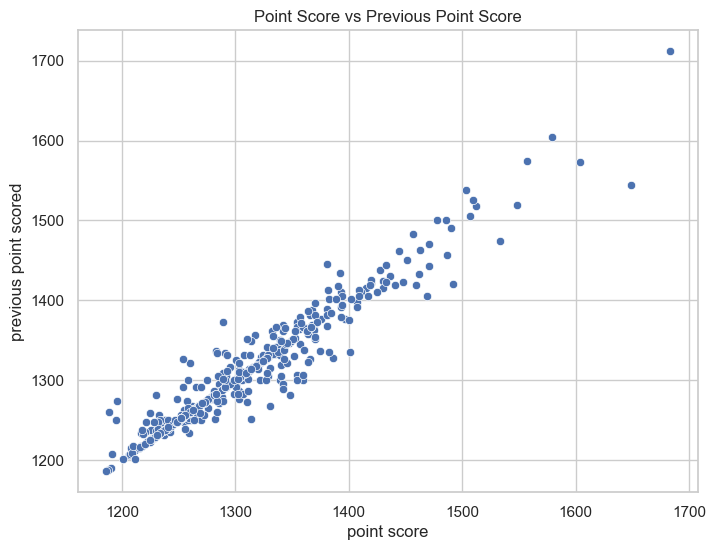


Shape after removing previous point scored: (511, 18)

Remaining columns: ['ranking', 'club name', 'country', 'point score', '1 year change', 'symbol change', '2013 Kenya Premier League', '2013 National Division One', '2013 unknown', 'Kenyan Premier League (1. League)', 'National Super League (2. League)', 'National Division One (3. League)', 'unkown', '2015 Kenyan Premier League', '2015 New Division', '2015 Nairobi Super League', '2015 FKF Premier League', '2015 FISA Nairobi']

First few rows of final dataset:
    ranking                  club name      country  point score  \
3       265               1º de Agosto       Angola       1512.0   
4      2530                 1º de Maio       Angola       1218.0   
13      945              Abia Warriors      Nigeria       1354.0   
19     2267                AC Mamahira         Mali       1241.0   
24     1128  Academia F. Amadou Diallo  Ivory Coast       1332.0   

    1 year change symbol change 2013 Kenya Premier League  \
3           

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def remove_redundant_features(df):
    # Before removal analysis
    print("Shape before removing previous point scored:", df.shape)
    
    # Visualize correlation one last time
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, 
                    x='point score', 
                    y='previous point scored')
    plt.title('Point Score vs Previous Point Score')
    plt.show()
    
    # Remove previous point scored
    columns_to_keep = [col for col in df.columns if col != 'previous point scored']
    df_final = df[columns_to_keep]
    
    print("\nShape after removing previous point scored:", df_final.shape)
    print("\nRemaining columns:", df_final.columns.tolist())
    
    return df_final

# Apply the feature selection
df_africa_final = remove_redundant_features(df_africa_cleaned)

# Verify final dataset
print("\nFirst few rows of final dataset:")
print(df_africa_final.head())

<Figure size 1000x800 with 0 Axes>

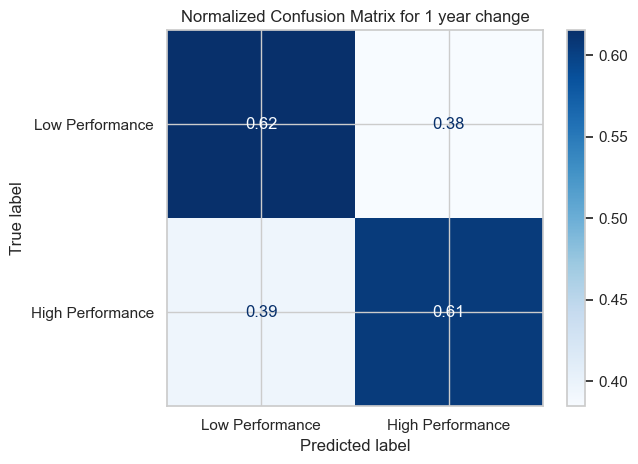


Classification Report for 1 year change:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        78
           1       0.61      0.61      0.61        76

    accuracy                           0.61       154
   macro avg       0.61      0.61      0.61       154
weighted avg       0.61      0.61      0.61       154





<Figure size 1000x800 with 0 Axes>

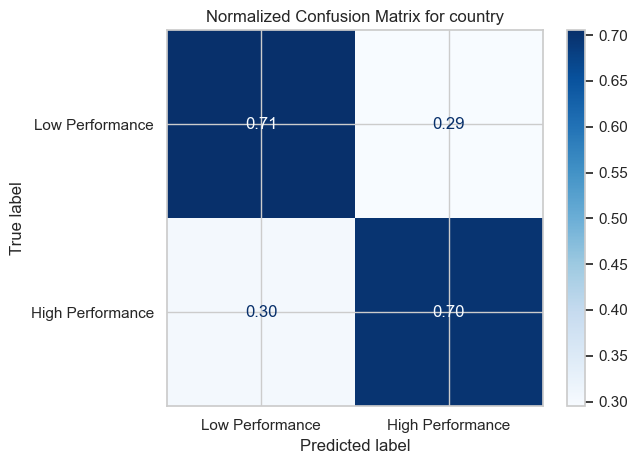


Classification Report for country:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        78
           1       0.70      0.70      0.70        76

    accuracy                           0.70       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.70      0.70      0.70       154





<Figure size 1000x800 with 0 Axes>

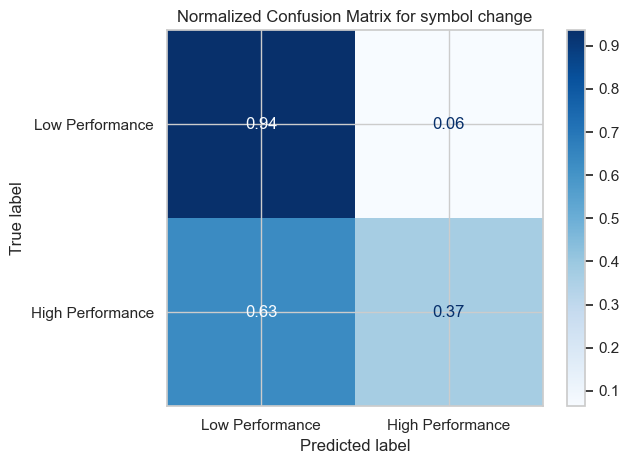


Classification Report for symbol change:
              precision    recall  f1-score   support

           0       0.60      0.94      0.73        78
           1       0.85      0.37      0.51        76

    accuracy                           0.66       154
   macro avg       0.73      0.65      0.62       154
weighted avg       0.72      0.66      0.63       154





In [10]:

def prepare_features_and_target(df):
    """Prepare features and target without data leakage"""
    # Create copy of dataframe
    df_prepared = df.copy()
    
    # Create target using point score median
    median_score = df_prepared['point score'].median()
    df_prepared['target'] = (df_prepared['point score'] > median_score).astype(int)
    
    # Remove point score and encode categorical features
    le = LabelEncoder()
    df_prepared['country'] = le.fit_transform(df_prepared['country'])
    df_prepared['symbol change'] = le.fit_transform(df_prepared['symbol change'])
    
    # Select features that don't cause data leakage
    features_to_analyze = [
        '1 year change',
        'country', 
        'symbol change'
    ]
    
    return df_prepared, features_to_analyze

def create_individual_confusion_matrix(df_prepared, feature, y):
    """Create and display confusion matrix for a single feature"""
    # Handle feature preparation
    X = df_prepared[[feature]]
    
    # Split data with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.3, 
        random_state=42,
        stratify=y
    )
    
    # Train model
    clf = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced'
    )
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)
    
    # Create figure
    plt.figure(figsize=(10, 8))
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=['Low Performance', 'High Performance']
    )
    
    # Plot
    disp.plot(cmap='Blues', values_format='.2f')
    plt.title(f'Normalized Confusion Matrix for {feature}')
    plt.tight_layout()
    plt.show()
    
    # Print classification report
    print(f"\nClassification Report for {feature}:")
    print(classification_report(y_test, y_pred))

def analyze_all_features(df):
    """Analyze each feature individually"""
    # Prepare features and get feature list
    df_prepared, features_to_analyze = prepare_features_and_target(df)
    
    # Create confusion matrix for each feature
    for feature in features_to_analyze:
        create_individual_confusion_matrix(
            df_prepared, 
            feature, 
            df_prepared['target']
        )
        print("\n" + "="*50 + "\n")

def main():
    # Run the analysis
    analyze_all_features(df_africa_final)

if __name__ == "__main__":
    main()

# Dataset Cleaning and Preprocessing Module
Module for cleaning and preprocessing African football clubs dataset, focusing on:
- Empty column identification
- Essential data preservation
- Data integrity verification



In [11]:

def identify_empty_columns(df: pd.DataFrame, league_columns: List[str]) -> List[str]:
    """Identify completely empty columns from the dataset"""
    return [col for col in league_columns if df[col].isnull().all()]

def clean_dataset(df: pd.DataFrame) -> Tuple[pd.DataFrame, List[str]]:
    """Clean the dataset by removing empty columns and keeping essential ones"""
    
    # Define columns to check and essential columns
    league_columns = [
        '2013 Kenya Premier League', '2013 National Division One', 
        '2013 unknown', 'Kenyan Premier League (1. League)',
        'National Super League (2. League)', 'National Division One (3. League)',
        'unkown', '2015 Kenyan Premier League', '2015 New Division',
        '2015 Nairobi Super League', '2015 FKF Premier League', '2015 FISA Nairobi','symbol change'
    ]
    
    essential_columns = [
        'ranking', 'club name', 'country',
        'point score', '1 year change'
    ]
    
    try:
        # Identify and drop empty columns
        empty_cols = identify_empty_columns(df, league_columns)
        print("Dropping empty columns:", *empty_cols, sep='\n- ')
        
        # Drop empty columns and keep essential ones
        df_cleaned = df.drop(columns=empty_cols)[essential_columns]
        
        # Print cleaning summary
        print(f"\nCleaning Summary:")
        print(f"Original shape: {df.shape}")
        print(f"Final shape: {df_cleaned.shape}")
        
        return df_cleaned, essential_columns
        
    except KeyError as e:
        print(f"Error: Column {e} not found in dataset")
        raise
    except Exception as e:
        print(f"Error during data cleaning: {e}")
        raise

def save_final_dataset(df: pd.DataFrame, base_path: str) -> str:
    """Save and verify the cleaned dataset"""
    try:
        # Create output directory
        output_dir = os.path.join(base_path, 'Cleaned_Data')
        os.makedirs(output_dir, exist_ok=True)
        
        # Save dataset
        cleaned_file = os.path.join(output_dir, 'African_Football_Clubs_Cleaned.csv')
        df.to_csv(cleaned_file, index=False)
        
        # Verify saved data
        df_verification = pd.read_csv(cleaned_file)
        
        # Verification summary
        print("\nVerification Summary:")
        print(f"File saved to: {cleaned_file}")
        print(f"Shape: {df_verification.shape}")
        print("\nColumns saved:", *df_verification.columns, sep='\n- ')
        
        # Data integrity check
        if len(df) != len(df_verification) or len(df.columns) != len(df_verification.columns):
            raise ValueError("Data integrity check failed: Mismatch in rows or columns")
        
        return cleaned_file
        
    except Exception as e:
        print(f"Error saving dataset: {e}")
        raise

def main():
    """Main execution function"""
    try:
        # Define base path
        base_path = r'C:\Users\MSI\OneDrive - ESPRIT\Bureau\4DS ESPRIT\SEM2\PI PROJECT\Scrap Datasets\Clubs Datasets'
        
        # Clean dataset
        df_cleaned, essential_cols = clean_dataset(df_africa_cleaned)
        
        # Save dataset
        cleaned_file_path = save_final_dataset(df_cleaned, base_path)
        
        # Display sample
        print("\nSample of cleaned dataset:")
        print(pd.read_csv(cleaned_file_path).head())
        
    except Exception as e:
        print(f"Error in main execution: {e}")
        raise

if __name__ == "__main__":
    main()

Dropping empty columns:
- 2013 Kenya Premier League
- 2013 National Division One
- 2013 unknown
- Kenyan Premier League (1. League)
- National Super League (2. League)
- National Division One (3. League)
- unkown
- 2015 Kenyan Premier League
- 2015 New Division
- 2015 Nairobi Super League
- 2015 FKF Premier League
- 2015 FISA Nairobi

Cleaning Summary:
Original shape: (511, 19)
Final shape: (511, 5)

Verification Summary:
File saved to: C:\Users\MSI\OneDrive - ESPRIT\Bureau\4DS ESPRIT\SEM2\PI PROJECT\Scrap Datasets\Clubs Datasets\Cleaned_Data\African_Football_Clubs_Cleaned.csv
Shape: (511, 5)

Columns saved:
- ranking
- club name
- country
- point score
- 1 year change

Sample of cleaned dataset:
   ranking                  club name      country  point score  1 year change
0      265               1º de Agosto       Angola       1512.0           11.0
1     2530                 1º de Maio       Angola       1218.0           24.0
2      945              Abia Warriors      Nigeria       

In [12]:


# Add this dictionary before the generate_african_club_data function
african_cities_stadiums = {
        'Algeria': {
        'cities': [
            'Algiers',      # Capital city
            'Oran',         # Major coastal city
            'Constantine',  # Major eastern city
            'Sétif',       # Northern city
            'Tizi Ouzou',  # Northern city
            'Béchar',      # Southern city
            'Blida',       # Northern city
            'Annaba'       # Coastal city
        ],
        'stadiums': [
            'Stade 5 Juillet 1962',          # Algiers, capacity: 64,000
            'Stade Olympic d\'Oran',         # Oran, capacity: 40,000
            'Stade Chahid Hamlaoui',        # Constantine, capacity: 40,000
            'Stade 8 Mai 1945',             # Sétif, capacity: 18,000
            'Stade 1er Novembre 1954',      # Tizi Ouzou, capacity: 20,000
            'Stade Mustapha Tchaker',       # Blida, capacity: 35,000
            'Stade 19 Mai 1956'             # Annaba, capacity: 30,000
        ]
    },
    'Angola': {
        'cities': [
            'Luanda',       # Capital city
            'Huambo',       # Central Angola
            'Lobito',       # Coastal city
            'Benguela',     # Coastal city
            'Lubango',      # Southern city
            'Malanje',      # Northern city
            'Namibe'        # Coastal city
        ],
        'stadiums': [
            'Estádio 11 de Novembro',       # Luanda, capacity: 50,000
            'Estádio Nacional da Tundavala', # Lubango, capacity: 20,000
            'Estádio da Cidadela',          # Luanda, capacity: 15,000
            'Estádio dos Coqueiros',        # Luanda, capacity: 12,000
            'Estádio Municipal de Benguela', # Benguela, capacity: 15,000
            'Estádio Nacional do Chiazi'     # Cabinda, capacity: 20,000
        ]
    },
    'Benin': {
        'cities': [
            'Cotonou',      # Largest city
            'Porto-Novo',   # Capital city
            'Parakou',      # Largest city in north
            'Abomey',       # Historical city
            'Bohicon',      # Central city
            'Natitingou',   # Northwestern city
            'Ouidah'        # Coastal city
        ],
        'stadiums': [
            'Stade de l\'Amitié',           # Cotonou, capacity: 20,000
            'Stade Charles de Gaulle',      # Porto-Novo, capacity: 15,000
            'Stade Municipal de Parakou',    # Parakou, capacity: 10,000
            'Stade René Pleven',            # Cotonou, capacity: 8,000
            'Stade Municipal de Ouidah',     # Ouidah, capacity: 5,000
            'Stade Mathieu Kérékou'         # Cotonou, capacity: 12,000
        ]
    },
    'Botswana': {
        'cities': [
            'Gaborone',     # Capital city
            'Francistown',  # Second largest city
            'Molepolole',   # Large village
            'Maun',         # Tourist town
            'Serowe',       # Central district
            'Kanye',        # Southern district
            'Lobatse'       # South-eastern city
        ],
        'stadiums': [
            'Botswana National Stadium',     # Gaborone, capacity: 22,000
            'Obed Itani Chilume Stadium',    # Francistown, capacity: 27,000
            'Lobatse Stadium',               # Lobatse, capacity: 20,000
            'Maun Sports Complex',           # Maun, capacity: 5,000
            'Serowe Sports Complex',         # Serowe, capacity: 5,000
            'Molepolole Sports Complex'      # Molepolole, capacity: 10,000
        ]
    },
    'Burkina Faso': {
        'cities': [
            'Ouagadougou',  # Capital city
            'Bobo-Dioulasso', # Second largest city
            'Koudougou',    # Third largest city
            'Banfora',      # Fourth largest city
            'Ouahigouya',   # Northern city
            'Tenkodogo',    # Eastern city
            'Kaya'          # North-central city
        ],
        'stadiums': [
            'Stade du 4 Août',              # Ouagadougou, capacity: 35,000
            'Stade Municipal de Ouagadougou', # Ouagadougou, capacity: 15,000
            'Stade Omnisports Bobo-Dioulasso', # Bobo-Dioulasso, capacity: 15,000
            'Stade Municipal de Koudougou',   # Koudougou, capacity: 5,000
            'Stade Banfora',                 # Banfora, capacity: 5,000
            'Stade Sangoulé Lamizana'        # Ouagadougou, capacity: 15,000
        ]
    },
    'Burundi': {
        'cities': [
            'Bujumbura',    # Largest city
            'Gitega',       # Capital city
            'Ngozi',        # Northern city
            'Muyinga',      # Northeastern city
            'Ruyigi',       # Eastern city
            'Makamba',      # Southern city
            'Rumonge'       # Western city
        ],
        'stadiums': [
            'Stade Prince Louis Rwagasore',  # Bujumbura, capacity: 22,000
            'Stade Urukundo',                # Bujumbura, capacity: 10,000
            'Stade Gitega',                  # Gitega, capacity: 8,000
            'Stade Ngozi',                   # Ngozi, capacity: 5,000
            'Stade Muyinga',                 # Muyinga, capacity: 5,000
            'Intwari Stadium'                # Bujumbura, capacity: 12,000
        ]
    },
    'Cabo Verde': {
        'cities': [
            'Praia',        # Capital city (Santiago Island)
            'Mindelo',      # Second largest (São Vicente Island)
            'Espargos',     # Sal Island
            'Santa Maria',  # Sal Island
            'São Filipe',   # Fogo Island
            'Assomada',     # Santiago Island
            'Tarrafal'      # Santiago Island
        ],
        'stadiums': [
            'Estádio Nacional de Cabo Verde',  # Praia, capacity: 15,000
            'Estádio Municipal Adérito Sena',  # Mindelo, capacity: 5,000
            'Estádio Municipal do Sal',        # Espargos, capacity: 5,000
            'Estádio Municipal de São Filipe', # São Filipe, capacity: 3,000
            'Estádio da Várzea'                # Praia, capacity: 8,000
        ]
    },
    'Cameroon': {
        'cities': [
            'Yaoundé',      # Capital city
            'Douala',       # Largest city
            'Garoua',       # Northern region
            'Bamenda',      # Northwest region
            'Maroua',       # Far North
            'Bafoussam',    # West region
            'Limbe'         # Southwest region
        ],
        'stadiums': [
            'Olembe Stadium',                  # Yaoundé, capacity: 60,000
            'Japoma Stadium',                  # Douala, capacity: 50,000
            'Roumde Adjia Stadium',           # Garoua, capacity: 30,000
            'Omnisports Stadium',             # Limbe, capacity: 20,000
            'Kouekong Stadium',               # Bafoussam, capacity: 20,000
            'Ahmadou Ahidjo Stadium'          # Yaoundé, capacity: 42,500
        ]
    },
    'Central African Republic': {
        'cities': [
            'Bangui',       # Capital city
            'Bimbo',        # Second largest
            'Berbérati',    # Western city
            'Carnot',       # Western region
            'Bambari',      # Central region
            'Bouar',        # Western region
            'Bossangoa'     # Northwestern region
        ],
        'stadiums': [
            'Barthélemy Boganda Stadium',      # Bangui, capacity: 20,000
            'Stade Municipal de Bangui',       # Bangui, capacity: 10,000
            'Stade Municipal de Berbérati',    # Berbérati, capacity: 5,000
            'Stade Municipal de Bambari',      # Bambari, capacity: 3,000
            'Stade de Bouar'                   # Bouar, capacity: 3,000
        ]
    },
    'Chad': {
        'cities': [
            'N\'Djamena',   # Capital city
            'Moundou',      # Second largest
            'Sarh',         # Southern city
            'Abéché',       # Eastern city
            'Am Timan',     # Eastern region
            'Bongor',       # Southwest region
            'Doba'          # Southern region
        ],
        'stadiums': [
            'Stade Omnisports Idriss Mahamat Ouya',  # N'Djamena, capacity: 30,000
            'Stade Municipal de Moundou',             # Moundou, capacity: 15,000
            'Stade Municipal de Sarh',                # Sarh, capacity: 10,000
            'Stade d\'Abéché',                       # Abéché, capacity: 5,000
            'Stade de Bongor'                        # Bongor, capacity: 5,000
        ]
    },
    'Comoros': {
        'cities': [
            'Moroni',       # Capital city (Grande Comore)
            'Mutsamudu',    # Anjouan Island
            'Fomboni',      # Mohéli Island
            'Domoni',       # Anjouan Island
            'Mitsamiouli',  # Grande Comore
            'Tsimbeo',      # Grande Comore
            'Iconi'         # Grande Comore
        ],
        'stadiums': [
            'Stade Said Mohamed Cheikh',       # Moroni, capacity: 12,000
            'Stade de Moroni',                 # Moroni, capacity: 6,000
            'Stade de Mutsamudu',              # Mutsamudu, capacity: 5,000
            'Stade de Fomboni',                # Fomboni, capacity: 3,000
            'Stade de Mitsamiouli'             # Mitsamiouli, capacity: 2,000
        ]
    },
     'Democratic Republic of the Congo': {
        'cities': [
            'Kinshasa',     # Capital and largest city (15M)
            'Lubumbashi',   # Mining capital (2.5M)
            'Mbuji-Mayi',   # Diamond center (2M)
            'Kisangani',    # River port (1.6M)
            'Goma',         # Eastern hub (1.5M)
            'Kolwezi',      # Mining city (1M)
            'Bukavu'        # Eastern city (870K)
        ],
        'stadiums': [
            'Stade des Martyrs',              # Kinshasa, 80,000 capacity
            'Stade TP Mazembe',               # Lubumbashi, 18,500 capacity
            'Stade Frédéric Kibassa Maliba',  # Lubumbashi, 35,000 capacity
            'Stade Tata Raphaël',             # Kinshasa, 30,000 capacity
            'Stade Joseph Kabila Kabange'     # Kindu, 15,000 capacity
        ]
    },
    'Republic of the Congo': {
        'cities': [
            'Brazzaville',  # Capital (2.2M)
            'Pointe-Noire', # Economic capital (1.2M)
            'Dolisie',      # Commercial hub (130K)
            'Nkayi',        # Industrial center (115K)
            'Ouesso',       # Northern hub (100K)
            'Impfondo',     # River port (90K)
            'Sibiti'        # Southern city (80K)
        ],
        'stadiums': [
            'Stade Alphonse Massamba-Débat',  # Brazzaville, 33,000 capacity
            'Stade Municipal de Pointe-Noire', # Pointe-Noire, 13,000 capacity
            'Stade Denis Sassou Nguesso',      # Dolisie, 15,000 capacity
            'Stade Félix Éboué',              # Brazzaville, 12,000 capacity
            'Complexe Sportif de Pointe-Noire' # Pointe-Noire, 10,000 capacity
        ]
    },
    'Djibouti': {
        'cities': [
            'Djibouti City', # Capital (600K)
            'Ali Sabieh',    # Second city (40K)
            'Tadjoura',      # Port city (25K)
            'Obock',         # Northern port (17K)
            'Dikhil',        # Southern hub (12K)
            'Arta',          # Coastal town (10K)
            'Holhol'         # Border town (8K)
        ],
        'stadiums': [
            'Stade du Ville',                 # Djibouti City, 10,000 capacity
            'Stade El Hadj Hassan Gouled',    # Djibouti City, 40,000 capacity
            'Stade Municipal d\'Ali Sabieh',  # Ali Sabieh, 5,000 capacity
            'Stade de Tadjoura',              # Tadjoura, 3,000 capacity
            'Centre Technique National'        # Djibouti City, 2,000 capacity
        ]
    },
    'Egypt': {
        'cities': [
            'Cairo',        # Capital (20M)
            'Alexandria',   # Mediterranean (5.2M)
            'Giza',        # pyramids (3.7M)
            'Shubra El Kheima', # Industrial (1.1M)
            'Port Said',   # Suez Canal (750K)
            'Suez',        # Canal city (728K)
            'Luxor'        # Historical (506K)
        ],
        'stadiums': [
            'Cairo International Stadium',     # Cairo, 75,000 capacity
            'Borg El Arab Stadium',           # Alexandria, 86,000 capacity
            'Al Salam Stadium',               # Cairo, 30,000 capacity
            'Alexandria Stadium',              # Alexandria, 20,000 capacity
            'Arab Contractors Stadium',        # Cairo, 35,000 capacity
            'Petrosport Stadium'              # Cairo, 25,000 capacity
        ]
    },
     'Equatorial Guinea': {
        'cities': [
            'Malabo',       # Capital (297K) - Bioko Island
            'Bata',         # Largest mainland city (250K)
            'Ebebiyin',     # Northern city (45K)
            'Mongomo',      # President's hometown (40K)
            'Aconibe',      # Eastern city (35K)
            'Evinayong',    # Central city (30K)
            'Luba'          # Southern Bioko (25K)
        ],
        'stadiums': [
            'Estadio de Malabo',              # Malabo, 15,250 capacity
            'Estadio de Bata',                # Bata, 35,000 capacity
            'Estadio de Mongomo',             # Mongomo, 15,000 capacity
            'Estadio La Libertad',            # Bata, 8,000 capacity
            'Nuevo Estadio de Ebebiyin'       # Ebebiyin, 5,000 capacity
        ]
    },
    'Eritrea': {
        'cities': [
            'Asmara',       # Capital (896K)
            'Keren',        # Second largest (146K)
            'Massawa',      # Port city (110K)
            'Assab',        # Port city (100K)
            'Mendefera',    # Southern city (95K)
            'Barentu',      # Western city (80K)
            'Dekemhare'     # Southern hub (75K)
        ],
        'stadiums': [
            'Asmara Stadium',                 # Asmara, 20,000 capacity
            'Cicero Stadium',                 # Asmara, 10,000 capacity
            'Massawa Stadium',                # Massawa, 8,000 capacity
            'Keren Stadium',                  # Keren, 7,000 capacity
            'Barentu Stadium'                 # Barentu, 5,000 capacity
        ]
    },
    'Eswatini': {
        'cities': [
            'Mbabane',      # Capital (95K)
            'Manzini',      # Largest city (110K)
            'Big Bend',     # Industrial center (40K)
            'Matsapha',     # Industrial town (35K)
            'Nhlangano',    # Southern city (30K)
            'Piggs Peak',   # Northern town (25K)
            'Siteki'        # Eastern town (20K)
        ],
        'stadiums': [
            'Somhlolo National Stadium',      # Lobamba, 20,000 capacity
            'Mavuso Sports Centre',           # Manzini, 5,000 capacity
            'King Sobhuza II Stadium',        # Nhlangano, 5,000 capacity
            'Trade Fair Ground',              # Manzini, 8,000 capacity
            'Prince of Wales Stadium'         # Mbabane, 5,000 capacity
        ]
    },
    'Ethiopia': {
        'cities': [
            'Addis Ababa',  # Capital (5M)
            'Dire Dawa',    # Industrial hub (440K)
            'Gondar',       # Historical city (360K)
            'Mek\'ele',     # Northern hub (310K)
            'Adama',        # Central city (300K)
            'Hawassa',      # Southern hub (280K)
            'Bahir Dar'     # Lake city (260K)
        ],
        'stadiums': [
            'Addis Ababa Stadium',            # Addis Ababa, 35,000 capacity
            'Abebe Bikila Stadium',           # Addis Ababa, 30,000 capacity
            'Dire Dawa Stadium',              # Dire Dawa, 18,000 capacity
            'Hawassa Stadium',                # Hawassa, 15,000 capacity
            'Bahir Dar Stadium',              # Bahir Dar, 60,000 capacity
            'Mekelle Stadium'                 # Mek'ele, 25,000 capacity
        ]
    },
    'Gabon': {
        'cities': [
            'Libreville',    # Capital (850K)
            'Port-Gentil',   # Oil city (150K)
            'Franceville',   # Mining center (110K)
            'Oyem',          # Northern hub (60K)
            'Moanda',        # Mining town (55K)
            'Mouila',        # Agricultural center (50K)
            'Lambaréné'      # River port (40K)
        ],
        'stadiums': [
            'Stade de l\'Amitié',            # Libreville, 40,000 capacity
            'Stade d\'Angondjé',             # Libreville, 35,000 capacity
            'Stade Rénovation',              # Port-Gentil, 20,000 capacity
            'Stade de Franceville',          # Franceville, 22,000 capacity
            'Stade d\'Oyem'                  # Oyem, 20,000 capacity
        ]
    },
    'Gambia': {
        'cities': [
            'Banjul',       # Capital (31K)
            'Serekunda',    # Largest city (340K)
            'Brikama',      # Second largest (77K)
            'Bakau',        # Coastal city (43K)
            'Farafenni',    # Transit hub (30K)
            'Lamin',        # Greater Banjul (25K)
            'Sukuta'        # Coastal town (15K)
        ],
        'stadiums': [
            'Independence Stadium',           # Bakau, 25,000 capacity
            'Brikama Box Bar Stadium',       # Brikama, 4,000 capacity
            'Serekunda East Mini Stadium',   # Serekunda, 5,000 capacity
            'Banjul Mini Stadium',           # Banjul, 3,000 capacity
            'FIFA Goal Project Stadium'       # Old Yundum, 5,000 capacity
        ]
    },
    'Ghana': {
        'cities': [
            'Accra',        # Capital (2.5M)
            'Kumasi',       # Ashanti capital (1.7M)
            'Tamale',       # Northern hub (950K)
            'Sekondi-Takoradi', # Twin city (445K)
            'Sunyani',      # Regional capital (250K)
            'Cape Coast',    # Historical (170K)
            'Ho'            # Volta region (120K)
        ],
        'stadiums': [
            'Baba Yara Stadium',             # Kumasi, 40,000 capacity
            'Accra Sports Stadium',          # Accra, 40,000 capacity
            'Cape Coast Stadium',            # Cape Coast, 15,000 capacity
            'Len Clay Stadium',              # Obuasi, 20,000 capacity
            'Tamale Stadium',                # Tamale, 21,000 capacity
            'Essipong Stadium'               # Sekondi, 20,000 capacity
        ]
    },
    'Guinea': {
        'cities': [
            'Conakry',      # Capital (1.7M)
            'Nzérékoré',    # Forest region (300K)
            'Kankan',       # Upper Guinea (200K)
            'Kindia',       # Lower Guinea (180K)
            'Labé',         # Middle Guinea (150K)
            'Boké',         # Mining hub (140K)
            'Mamou'         # Gateway city (130K)
        ],
        'stadiums': [
            'Stade du 28 Septembre',         # Conakry, 35,000 capacity
            'Stade Général Lansana Conté',   # Nongo, 50,000 capacity
            'Stade de Nzérékoré',           # Nzérékoré, 15,000 capacity
            'Stade de Kankan',              # Kankan, 10,000 capacity
            'Stade Régional de Labé'        # Labé, 8,000 capacity
        ]
    },
    'Guinea-Bissau': {
        'cities': [
            'Bissau',       # Capital (500K)
            'Gabú',         # Eastern hub (40K)
            'Bafatá',       # Regional center (35K)
            'Cacheu',       # Historical port (15K)
            'Farim',        # Northern town (12K)
            'Mansôa',       # Central town (10K)
            'Bissorã'       # Northern hub (10K)
        ],
        'stadiums': [
            'Estádio 24 de Setembro',        # Bissau, 20,000 capacity
            'Estádio Lino Correia',         # Bissau, 12,000 capacity
            'Estádio Regional de Gabú',     # Gabú, 5,000 capacity
            'Estádio Regional de Bafatá',   # Bafatá, 5,000 capacity
            'Estádio de Mansôa'             # Mansôa, 3,000 capacity
        ]
    },
    'Ivory Coast': {
        'cities': [
            'Abidjan',      # Economic capital (4.7M)
            'Yamoussoukro', # Political capital (355K)
            'Bouaké',       # Central hub (540K)
            'Daloa',        # Western hub (320K)
            'Korhogo',      # Northern center (290K)
            'San-Pédro',    # Port city (260K)
            'Man'           # Western city (180K)
        ],
        'stadiums': [
            'Stade Olympique Alassane Ouattara', # Abidjan, 60,000 capacity
            'Stade Félix Houphouët-Boigny',     # Abidjan, 45,000 capacity
            'Stade de la Paix',                 # Bouaké, 40,000 capacity
            'Stade Laurent Pokou',              # San-Pédro, 20,000 capacity
            'Stade Amadou Gon Coulibaly',       # Korhogo, 20,000 capacity
            'Stade Charles Konan Banny'         # Yamoussoukro, 20,000 capacity
        ]
    },
    'Kenya': {
        'cities': [
            'Nairobi',      # Capital (4.3M)
            'Mombasa',      # Coastal hub (1.2M)
            'Kisumu',       # Lake Victoria (400K)
            'Nakuru',       # Rift Valley (360K)
            'Eldoret',      # Highland city (350K)
            'Thika',        # Industrial (300K)
            'Malindi'       # Tourist coast (120K)
        ],
        'stadiums': [
            'Moi International Sports Centre', # Nairobi, 60,000 capacity
            'Nyayo National Stadium',         # Nairobi, 30,000 capacity
            'Mombasa Municipal Stadium',      # Mombasa, 20,000 capacity
            'Kipchoge Keino Stadium',         # Eldoret, 15,000 capacity
            'Afraha Stadium',                 # Nakuru, 8,000 capacity
            'Kasarani Annex Stadium'          # Nairobi, 5,000 capacity
        ]
    },
    'Lesotho': {
        'cities': [
            'Maseru',       # Capital (330K)
            'Teyateyaneng', # Northern hub (75K)
            'Mafeteng',     # Southern city (65K)
            'Hlotse',       # Northern city (55K)
            'Mohale\'s Hoek', # Southern hub (40K)
            'Quthing',      # Mountain region (35K)
            'Butha-Buthe'   # Northern region (30K)
        ],
        'stadiums': [
            'Setsoto Stadium',               # Maseru, 20,000 capacity
            'Lesotho National Stadium',      # Maseru, 15,000 capacity
            'Leribe Stadium',                # Hlotse, 3,000 capacity
            'Bambatha Tšita Sports Arena',   # Maseru, 2,000 capacity
            'Mafeteng Stadium'               # Mafeteng, 2,000 capacity
        ]
    },
    'Liberia': {
        'cities': [
            'Monrovia',     # Capital (1.5M)
            'Gbarnga',      # Central hub (45K)
            'Buchanan',     # Port city (35K)
            'Kakata',       # Western city (35K)
            'Harper',       # Coastal city (30K)
            'Voinjama',     # Northern hub (27K)
            'Zwedru'        # Eastern city (25K)
        ],
        'stadiums': [
            'Samuel Kanyon Doe Sports Complex', # Monrovia, 35,000 capacity
            'Antoinette Tubman Stadium',      # Monrovia, 15,000 capacity
            'Doris Williams Stadium',         # Buchanan, 8,000 capacity
            'Nancy B. Doe Stadium',           # Kakata, 5,000 capacity
            'Barclay Training Center'         # Monrovia, 3,000 capacity
        ]
    },
    'Libya': {
        'cities': [
            'Tripoli',      # Capital (1.2M)
            'Benghazi',     # Eastern hub (650K)
            'Misrata',      # Coastal city (400K)
            'Zliten',       # Northwestern (250K)
            'Sabha',        # Southern hub (130K)
            'Zawiya',       # Western coast (200K)
            'Bayda'         # Eastern city (250K)
        ],
        'stadiums': [
            '11 June Stadium',               # Tripoli, 80,000 capacity
            'Benghazi Stadium',             # Benghazi, 65,000 capacity
            'Misrata Stadium',              # Misrata, 25,000 capacity
            'Sabha Stadium',                # Sabha, 20,000 capacity
            'Omar Hamadi Stadium'           # Tripoli, 15,000 capacity
        ]
    },
    'Madagascar': {
        'cities': [
            'Antananarivo', # Capital (3.2M)
            'Toamasina',    # Port city (325K)
            'Antsirabe',    # Highland city (250K)
            'Fianarantsoa', # Southern hub (200K)
            'Mahajanga',    # Coastal hub (220K)
            'Toliara',      # Southwest port (160K)
            'Antsiranana'   # Northern port (115K)
        ],
        'stadiums': [
            'Mahamasina Municipal Stadium',  # Antananarivo, 23,000 capacity
            'Stade Barikadimy',             # Toamasina, 15,000 capacity
            'Stade Rabemananjara',          # Mahajanga, 8,000 capacity
            'Stade Municipal de Toliara',    # Toliara, 7,000 capacity
            'Stade d\'Antsirabe'            # Antsirabe, 5,000 capacity
        ]
    },
    'Malawi': {
        'cities': [
            'Lilongwe',     # Capital (1.1M)
            'Blantyre',     # Commercial hub (800K)
            'Mzuzu',        # Northern hub (220K)
            'Zomba',        # Former capital (150K)
            'Kasungu',      # Central region (60K)
            'Mangochi',     # Lake city (50K)
            'Karonga'       # Northern city (45K)
        ],
        'stadiums': [
            'Bingu National Stadium',        # Lilongwe, 41,000 capacity
            'Kamuzu Stadium',                # Blantyre, 25,000 capacity
            'Civo Stadium',                  # Lilongwe, 15,000 capacity
            'Mzuzu Stadium',                 # Mzuzu, 12,000 capacity
            'Zomba Community Centre Ground'   # Zomba, 8,000 capacity
        ]
    },
    'Mali': {
        'cities': [
            'Bamako',       # Capital (2.7M)
            'Sikasso',      # Southern hub (350K)
            'Mopti',        # Central hub (150K)
            'Koutiala',     # Agricultural center (140K)
            'Ségou',        # River city (130K)
            'Kayes',        # Western city (120K)
            'Gao'          # Northern hub (90K)
        ],
        'stadiums': [
            'Stade 26 Mars',                # Bamako, 50,000 capacity
            'Stade Modibo Keïta',           # Bamako, 25,000 capacity
            'Stade Omnisports de Sikasso',  # Sikasso, 15,000 capacity
            'Stade Amary Daou',             # Ségou, 10,000 capacity
            'Stade Abdoulaye Makoro Sissoko' # Kayes, 8,000 capacity
        ]
    },
    'Mauritania': {
        'cities': [
            'Nouakchott',   # Capital (1.2M)
            'Nouadhibou',   # Port city (160K)
            'Kiffa',        # Southern hub (60K)
            'Kaédi',        # River city (55K)
            'Rosso',        # Border city (50K)
            'Zouérat',      # Mining city (45K)
            'Atar'          # Northern hub (40K)
        ],
        'stadiums': [
            'Stade Olympique de Nouakchott', # Nouakchott, 25,000 capacity
            'Stade Cheikha Ould Boïdiya',    # Nouakchott, 10,000 capacity
            'Stade de Nouadhibou',           # Nouadhibou, 10,000 capacity
            'Stade Municipal de Kiffa',       # Kiffa, 5,000 capacity
            'Stade de Rosso'                 # Rosso, 3,000 capacity
        ]
    },
    'Mauritius': {
        'cities': [
            'Port Louis',   # Capital (150K)
            'Beau Bassin-Rose Hill', # Twin cities (100K)
            'Vacoas-Phoenix', # Central city (100K)
            'Curepipe',     # Highland city (80K)
            'Quatre Bornes', # Central hub (75K)
            'Triolet',      # Northern town (25K)
            'Goodlands'     # Northern hub (20K)
        ],
        'stadiums': [
            'Stade George V',               # Curepipe, 6,200 capacity
            'Stade Anjalay',                # Belle Vue, 18,000 capacity
            'Auguste Vollaire Stadium',      # Flacq, 6,000 capacity
            'St. François Xavier Stadium',   # Port Louis, 5,000 capacity
            'Germain Comarmond Stadium'      # Bambous, 7,000 capacity
        ]
    },
     'Morocco': {
        'cities': [
            'Casablanca',   # Largest city (3.4M)
            'Rabat',        # Capital (1.9M)
            'Fez',          # Cultural hub (1.2M)
            'Marrakesh',    # Tourist center (1M)
            'Tangier',      # Port city (950K)
            'Agadir',       # Coastal hub (450K)
            'Tétouan'       # Northern city (380K)
        ],
        'stadiums': [
            'Stade Mohammed V',              # Casablanca, 67,000 capacity
            'Prince Moulay Abdellah Stadium', # Rabat, 52,000 capacity
            'Grand Stade de Marrakech',      # Marrakesh, 45,000 capacity
            'Grand Stade de Tanger',         # Tangier, 45,000 capacity
            'Stade Adrar',                   # Agadir, 45,000 capacity
            'Stade de Fez'                   # Fez, 45,000 capacity
        ]
    },
    'Mozambique': {
        'cities': [
            'Maputo',       # Capital (1.1M)
            'Matola',       # Industrial hub (900K)
            'Nampula',      # Northern hub (650K)
            'Beira',        # Port city (530K)
            'Chimoio',      # Central city (320K)
            'Nacala',       # Port city (250K)
            'Quelimane'     # Coastal hub (220K)
        ],
        'stadiums': [
            'Estádio do Zimpeto',           # Maputo, 42,000 capacity
            'Estádio da Machava',           # Maputo, 35,000 capacity
            'Estádio do Ferroviário',       # Beira, 15,000 capacity
            'Estádio 25 de Junho',          # Nampula, 12,000 capacity
            'Estádio Municipal de Pemba'     # Pemba, 10,000 capacity
        ]
    },
    'Namibia': {
        'cities': [
            'Windhoek',     # Capital (400K)
            'Walvis Bay',   # Port city (110K)
            'Swakopmund',   # Coastal resort (45K)
            'Oshakati',     # Northern hub (37K)
            'Rundu',        # Northeast hub (35K)
            'Otjiwarongo',  # Central city (28K)
            'Keetmanshoop'  # Southern hub (20K)
        ],
        'stadiums': [
            'Independence Stadium',          # Windhoek, 25,000 capacity
            'Sam Nujoma Stadium',           # Windhoek, 10,300 capacity
            'Kuisebmond Stadium',           # Walvis Bay, 8,000 capacity
            'Legare Stadium',               # Gobabis, 5,000 capacity
            'Rundu Sports Stadium'          # Rundu, 5,000 capacity
        ]
    },
    'Niger': {
        'cities': [
            'Niamey',       # Capital (1.3M)
            'Zinder',       # Second largest (350K)
            'Maradi',       # Southern hub (300K)
            'Agadez',       # Northern hub (120K)
            'Tahoua',       # Western city (115K)
            'Dosso',        # Southwest hub (95K)
            'Diffa'         # Eastern city (50K)
        ],
        'stadiums': [
            'Stade Général Seyni Kountché', # Niamey, 35,000 capacity
            'Stade Municipal de Niamey',    # Niamey, 15,000 capacity
            'Stade Regional de Maradi',     # Maradi, 10,000 capacity
            'Stade de Zinder',              # Zinder, 8,000 capacity
            'Stade Municipal de Tahoua'     # Tahoua, 5,000 capacity
        ]
    },
    'Nigeria': {
        'cities': [
            'Lagos',        # Largest city (14.8M)
            'Kano',         # Northern hub (4M)
            'Ibadan',       # Western hub (3.6M)
            'Abuja',        # Capital (3.5M)
            'Port Harcourt', # Oil hub (2.1M)
            'Benin City',   # Southern hub (1.5M)
            'Jos'           # Central hub (1M)
        ],
        'stadiums': [
            'Moshood Abiola National Stadium', # Abuja, 60,000 capacity
            'Godswill Akpabio Stadium',       # Uyo, 30,000 capacity
            'Stephen Keshi Stadium',          # Asaba, 22,000 capacity
            'Teslim Balogun Stadium',        # Lagos, 24,000 capacity
            'Samuel Ogbemudia Stadium',      # Benin City, 20,000 capacity
            'Lagos National Stadium'          # Lagos, 45,000 capacity
        ]
    },
    'Rwanda': {
        'cities': [
            'Kigali',       # Capital (1.2M)
            'Butare',       # University city (90K)
            'Gitarama',     # Central hub (88K)
            'Ruhengeri',    # Northern hub (86K)
            'Gisenyi',      # Lake city (84K)
            'Byumba',       # Northern city (70K)
            'Cyangugu'      # Lake city (63K)
        ],
        'stadiums': [
            'Amahoro Stadium',              # Kigali, 25,000 capacity
            'Kigali Regional Stadium',      # Kigali, 22,000 capacity
            'Huye Stadium',                 # Butare, 20,000 capacity
            'Umuganda Stadium',             # Gisenyi, 8,500 capacity
            'Stade de Ruhengeri'            # Ruhengeri, 5,000 capacity
        ]
    },
    'São Tomé and Príncipe': {
        'cities': [
            'São Tomé',     # Capital (80K)
            'Santo Amaro',  # Northern town (8K)
            'Neves',        # Western town (7K)
            'Santana',      # Eastern town (7K)
            'Santo António', # Príncipe capital (6K)
            'Guadalupe',    # Northern hub (4K)
            'Trindade'      # Central town (4K)
        ],
        'stadiums': [
            'Estádio Nacional 12 de Julho', # São Tomé, 6,500 capacity
            'Estádio Regional 13 de Julho', # Príncipe, 1,000 capacity
            'Campo de Folha Fede',         # São Tomé, 1,000 capacity
            'Campo de Riboque',            # São Tomé, 800 capacity
            'Campo de Santo Amaro'         # Santo Amaro, 500 capacity
        ]
    },
     'Senegal': {
        'cities': [
            'Dakar',        # Capital (3.1M)
            'Touba',        # Religious center (529K)
            'Thiès',        # Industrial hub (320K)
            'Rufisque',     # Port city (221K)
            'Kaolack',      # Trading center (199K)
            'Saint-Louis',  # Historic capital (171K)
            'Ziguinchor'    # Southern hub (158K)
        ],
        'stadiums': [
            'Stade Abdoulaye Wade',         # Diamniadio, 50,000 capacity
            'Stade Léopold Sédar Senghor',  # Dakar, 60,000 capacity
            'Stade Lat Dior',               # Thiès, 20,000 capacity
            'Stade Aline Sitoe Diatta',     # Ziguinchor, 10,000 capacity
            'Stade Demba Diop'              # Dakar, 15,000 capacity
        ]
    },
    'Seychelles': {
        'cities': [
            'Victoria',     # Capital (26K)
            'Anse Boileau', # Western district (4K)
            'Beau Vallon',  # Northern hub (4K)
            'Cascade',      # Eastern district (3K)
            'Anse Royale',  # Southern hub (3K)
            'Baie Lazare',  # Southern coast (2.5K)
            'La Digue'      # Island settlement (2K)
        ],
        'stadiums': [
            'Stade Linité',                 # Victoria, 10,000 capacity
            'Stad Popiler',                 # Victoria, 5,000 capacity
            'Amitié Stadium',               # Praslin, 1,000 capacity
            'Anse Royale Stadium',          # Anse Royale, 1,000 capacity
            'Unity Stadium'                 # Victoria, 2,000 capacity
        ]
    },
    'Sierra Leone': {
        'cities': [
            'Freetown',     # Capital (1.1M)
            'Bo',           # Second city (175K)
            'Kenema',       # Eastern hub (143K)
            'Makeni',       # Northern hub (109K)
            'Koidu',        # Diamond center (88K)
            'Port Loko',    # Northern town (45K)
            'Lunsar'        # Mining town (34K)
        ],
        'stadiums': [
            'National Stadium',             # Freetown, 45,000 capacity
            'Bo Stadium',                   # Bo, 25,000 capacity
            'Wusum Sports Stadium',         # Makeni, 15,000 capacity
            'Kenema Town Ground',           # Kenema, 10,000 capacity
            'Port Loko Stadium'             # Port Loko, 5,000 capacity
        ]
    },
    'Somalia': {
        'cities': [
            'Mogadishu',    # Capital (2.2M)
            'Hargeisa',     # Northern hub (760K)
            'Bosaso',       # Port city (700K)
            'Galkayo',      # Central hub (545K)
            'Kismayo',      # Southern port (180K)
            'Merca',        # Coastal city (230K)
            'Baidoa'        # Inland hub (415K)
        ],
        'stadiums': [
            'Mogadishu Stadium',            # Mogadishu, 65,000 capacity
            'Banadir Stadium',              # Mogadishu, 15,000 capacity
            'Hargeisa National Stadium',    # Hargeisa, 10,000 capacity
            'Kismayo Stadium',              # Kismayo, 8,000 capacity
            'Bosaso Stadium'                # Bosaso, 5,000 capacity
        ]
    },
    'South Africa': {
        'cities': [
            'Johannesburg', # Largest city (5.7M)
            'Cape Town',    # Legislative capital (4.6M)
            'Durban',       # Port city (3.8M)
            'Pretoria',     # Administrative capital (2.9M)
            'Port Elizabeth', # Coastal hub (1.3M)
            'Bloemfontein', # Judicial capital (556K)
            'Nelspruit'     # Northeast hub (110K)
        ],
        'stadiums': [
            'FNB Stadium',                  # Johannesburg, 94,736 capacity
            'Moses Mabhida Stadium',        # Durban, 62,760 capacity
            'Cape Town Stadium',            # Cape Town, 55,000 capacity
            'Loftus Versfeld Stadium',      # Pretoria, 51,762 capacity
            'Ellis Park Stadium',           # Johannesburg, 62,567 capacity
            'Royal Bafokeng Stadium'        # Rustenburg, 44,530 capacity
        ]
    },
    'South Sudan': {
        'cities': [
            'Juba',         # Capital (500K)
            'Wau',          # Western hub (150K)
            'Malakal',      # Northern hub (120K)
            'Bor',          # Central city (65K)
            'Yei',          # Southern hub (60K)
            'Yambio',       # Western city (40K)
            'Torit'         # Eastern hub (20K)
        ],
        'stadiums': [
            'Juba Stadium',                 # Juba, 12,000 capacity
            'Wau Stadium',                  # Wau, 7,000 capacity
            'Malakal Stadium',              # Malakal, 5,000 capacity
            'Bor Stadium',                  # Bor, 3,000 capacity
            'Freedom Square Ground'         # Juba, 2,000 capacity
        ]
    },
    'Sudan': {
        'cities': [
            'Khartoum',     # Capital (5.2M)
            'Omdurman',     # Twin city (2.4M)
            'Bahri',        # Twin city (1.6M)
            'Port Sudan',   # Port city (490K)
            'Kassala',      # Eastern hub (400K)
            'Al-Ubayyid',   # Western hub (340K)
            'Nyala'         # Darfur region (565K)
        ],
        'stadiums': [
            'Al Merreikh Stadium',          # Omdurman, 43,000 capacity
            'Al Hilal Stadium',             # Omdurman, 35,000 capacity
            'Khartoum Stadium',             # Khartoum, 23,000 capacity
            'Port Sudan Stadium',           # Port Sudan, 15,000 capacity
            'Al-Ubayyid Stadium'            # Al-Ubayyid, 10,000 capacity
        ]
    },
     'Tanzania': {
        'cities': [
            'Dar es Salaam',  # Largest city (6.7M)
            'Mwanza',         # Lake Victoria (1.2M)
            'Arusha',         # Tourist hub (510K)
            'Dodoma',         # Capital (410K)
            'Zanzibar City',  # Island capital (400K)
            'Tanga',          # Port city (280K)
            'Mbeya'          # Southern hub (390K)
        ],
        'stadiums': [
            'Benjamin Mkapa Stadium',        # Dar es Salaam, 60,000 capacity
            'CCM Kirumba Stadium',          # Mwanza, 35,000 capacity
            'Sheikh Amri Abeid Stadium',    # Arusha, 20,000 capacity
            'Jamhuri Stadium',              # Dodoma, 15,000 capacity
            'Uhuru Stadium'                 # Dar es Salaam, 25,000 capacity
        ]
    },
    'Togo': {
        'cities': [
            'Lomé',          # Capital (837K)
            'Sokodé',        # Second city (117K)
            'Kara',          # Northern hub (104K)
            'Kpalimé',       # Western city (75K)
            'Atakpamé',      # Central city (69K)
            'Bassar',        # Northern town (61K)
            'Tsévié'         # Southern hub (55K)
        ],
        'stadiums': [
            'Stade de Kégué',               # Lomé, 30,000 capacity
            'Stade Municipal de Sokodé',     # Sokodé, 15,000 capacity
            'Stade de Kara',                # Kara, 10,000 capacity
            'Stade Municipal d\'Atakpamé',  # Atakpamé, 8,000 capacity
            'Stade Agoè-Nyivé'              # Lomé, 5,000 capacity
        ]
    },
    'Tunisia': {
        'cities': [
            'Tunis',         # Capital (2.7M)
            'Sfax',          # Industrial hub (955K)
            'Sousse',        # Tourist center (674K)
            'Kairouan',      # Religious city (570K)
            'Bizerte',       # Port city (568K)
            'Gabès',         # Coastal hub (392K)
            'Monastir'       # Tourist resort (93K)
        ],
        'stadiums': [
            'Stade Olympique de Radès',     # Radès, 60,000 capacity
            'Stade Olympique de Sousse',    # Sousse, 45,000 capacity
            'Stade Taïeb Mhiri',           # Sfax, 25,000 capacity
            'Stade 15 Octobre',            # Bizerte, 20,000 capacity
            'Stade Mustapha Ben Jannet'    # Monastir, 20,000 capacity
        ]
    },
    'Uganda': {
        'cities': [
            'Kampala',       # Capital (3.3M)
            'Gulu',          # Northern hub (150K)
            'Lira',          # Northern city (119K)
            'Mbarara',       # Western hub (195K)
            'Jinja',         # Industrial (72K)
            'Mbale',         # Eastern hub (96K)
            'Entebbe'        # Airport city (70K)
        ],
        'stadiums': [
            'Mandela National Stadium',     # Kampala, 45,202 capacity
            'St Mary\'s Stadium',           # Kitende, 15,000 capacity
            'MTN Omondi Stadium',          # Kampala, 10,000 capacity
            'Mbale Municipal Stadium',      # Mbale, 8,000 capacity
            'Kakyeka Stadium'               # Mbarara, 5,000 capacity
        ]
    },
    'Zambia': {
        'cities': [
            'Lusaka',        # Capital (2.5M)
            'Kitwe',         # Copperbelt (504K)
            'Ndola',         # Industrial (455K)
            'Kabwe',         # Central (202K)
            'Chingola',      # Mining city (148K)
            'Mufulira',      # Copperbelt (125K)
            'Livingstone'    # Tourist hub (109K)
        ],
        'stadiums': [
            'National Heroes Stadium',      # Lusaka, 60,000 capacity
            'Levy Mwanawasa Stadium',      # Ndola, 49,800 capacity
            'Nkana Stadium',               # Kitwe, 20,000 capacity
            'Arthur Davies Stadium',        # Kitwe, 15,000 capacity
            'Independence Stadium'          # Lusaka, 30,000 capacity
        ]
    },
    'Zimbabwe': {
        'cities': [
            'Harare',        # Capital (2.1M)
            'Bulawayo',      # Second city (653K)
            'Chitungwiza',   # Satellite city (371K)
            'Mutare',        # Eastern hub (188K)
            'Gweru',         # Central city (146K)
            'Kwekwe',        # Mining city (100K)
            'Kadoma'         # Mining hub (79K)
        ],
        'stadiums': [
            'National Sports Stadium',      # Harare, 60,000 capacity
            'Barbourfields Stadium',        # Bulawayo, 40,000 capacity
            'Rufaro Stadium',              # Harare, 35,000 capacity
            'Mandava Stadium',             # Zvishavane, 15,000 capacity
            'Colliery Stadium'             # Hwange, 10,000 capacity
        ]
    }
}
    # African leagues by country
african_leagues = {
    'Algeria': ['Ligue Professionnelle 1', 'Ligue Professionnelle 2'],
    'Angola': ['Girabola', 'Segunda Divisão'],
    'Benin': ['Benin Premier League'],
    'Botswana': ['Botswana Premier League', 'First Division North', 'First Division South'],
    'Burkina Faso': ['Burkinabé Premier League'],
    'Burundi': ['Burundi Premier League'],
    'Cabo Verde': ['Cape Verdean Football Championship'],
    'Cameroon': ['Elite One', 'Elite Two'],
    'Central African Republic': ['Central African Republic League'],
    'Chad': ['Chad Premier League'],
    'Comoros': ['Comoros Premier League'],
    'Democratic Republic of the Congo': ['Linafoot'],
    'Republic of the Congo': ['Congo Premier League'],
    'Djibouti': ['Djibouti Premier League'],
    'Egypt': ['Egyptian Premier League', 'Egyptian Second Division'],
    'Equatorial Guinea': ['Equatoguinean Primera División'],
    'Eritrea': ['Eritrean Premier League'],
    'Eswatini': ['Premier League of Eswatini'],
    'Ethiopia': ['Ethiopian Premier League'],
    'Gabon': ['Gabon Championnat National D1'],
    'Gambia': ['GFA League First Division'],
    'Ghana': ['Ghana Premier League', 'Division One League'],
    'Guinea': ['Guinée Championnat National'],
    'Guinea-Bissau': ['Campeonato Nacional da Guiné-Bissau'],
    'Ivory Coast': ['Ligue 1', 'Ligue 2'],
    'Kenya': ['Kenyan Premier League', 'National Super League'],
    'Lesotho': ['Lesotho Premier League'],
    'Liberia': ['Liberian Premier League'],
    'Libya': ['Libyan Premier League'],
    'Madagascar': ['THB Champions League'],
    'Malawi': ['Malawi Premier Division'],
    'Mali': ['Malian Première Division'],
    'Mauritania': ['Mauritanean Premier League'],
    'Mauritius': ['Mauritian Premier League'],
    'Morocco': ['Botola Pro', 'Botola 2'],
    'Mozambique': ['Moçambola'],
    'Namibia': ['Namibia Premier League'],
    'Niger': ['Niger Premier League'],
    'Nigeria': ['Nigeria Professional Football League', 'Nigeria National League'],
    'Rwanda': ['Rwanda Premier League'],
    'São Tomé and Príncipe': ['São Tomé and Príncipe Championship'],
    'Senegal': ['Senegal Premier League'],
    'Seychelles': ['Seychelles First Division'],
    'Sierra Leone': ['Sierra Leone National Premier League'],
    'Somalia': ['Somali Premier League'],
    'South Africa': ['Premier Soccer League', 'National First Division'],
    'South Sudan': ['South Sudan Premier League'],
    'Sudan': ['Sudan Premier League'],
    'Tanzania': ['Tanzanian Premier League', 'First Division League'],
    'Togo': ['Togolese Championnat National'],
    'Tunisia': ['Tunisian Ligue Professionnelle 1', 'Tunisian Ligue 2'],
    'Uganda': ['Uganda Premier League'],
    'Zambia': ['Zambian Premier League'],
    'Zimbabwe': ['Zimbabwe Premier Soccer League']
 }
 
    # Common African playing styles and formations
playing_styles = [
    # Traditional African Styles
    'High-Energy Pressing',      # Fast-paced, aggressive pressing
    'Physical Power Play',       # Emphasizing physical strength
    'Quick Counter-attacks',     # Fast transitions
    'Technical Dribbling',       # Individual skill-focused
    'Possession-based',          # Ball retention focus
    
    # Modern Adaptations
    'Total Football',           # Fluid position switching
    'Direct Play',             # Long-ball tactics
    'Tiki-Taka Adaptation',    # Short passing game
    'Wing Play',               # Focus on wide attacks
    'Defensive Solidarity',    # Defensive organization
    
    # Regional Styles
    'North African Technical', # Emphasis on skill and possession
    'West African Power',     # Physical and direct
    'East African Speed',     # Pace-based attacks
    'Southern African Mix',   # Blend of physical and technical
    
    # Modern Tactical Approaches
    'High Press',            # Aggressive forward pressing
    'Low Block Counter',     # Defensive counter-attacking
    'Possession Control',    # Ball dominance focus
    'Attacking Overload',    # Numbers in attack
    'Defensive Structure'    # Organized defending
 ]
formations = [
    # Traditional Formations
    "'4-4-2'",        # Classic balanced formation
    "'4-3-3'",        # Attack-focused
    "'4-2-3-1'",      # Modern standard
    "'3-5-2'",        # Wing-back system
    "'5-4-1'",        # Defensive setup
    
    # Modern Variations
    "'4-1-4-1'",      # Controlled midfield
    "'4-2-2-2'",      # Box midfield
    "'3-4-3'",        # Attacking three-back
    "'5-3-2'",        # Defensive counter
    "'4-5-1'",        # Midfield control
    
    # Fluid Systems
    "'4-3-2-1'",      # Christmas tree
    "'3-6-1'",        # Midfield dominance
    "'4-1-3-2'",      # Diamond midfield
    "'3-4-2-1'",      # Modern hybrid
    "'4-4-1-1'",      # Second striker system
    
    # Specialized Formations
    "'3-3-3-1'",      # Total football approach
    "'4-2-4'",        # Ultra-attacking
    "'5-2-3'",        # Counter-attacking
    "'4-3-1-2'",      # Narrow attack
    "'3-5-1-1'"       # Defensive midfielder focus
]
simplified_positions = [
        'Goalkeeper',
        'Defender',
        'Midfielder',
        'Forward'
 ]
 

        

        
    

In [13]:
def generate_african_club_data(existing_df: pd.DataFrame) -> pd.DataFrame:
    """Generate realistic additional data for African football clubs"""
    
   # Copy existing dataframe
    df_extended = existing_df.copy()
    num_rows = len(df_extended)
    # Generate league data
    df_extended['league'] = df_extended['country'].map(
        lambda x: random.choice(african_leagues.get(x, ['National League']))
    )
    
    def get_city_stadium(country):
        """Get city and corresponding stadium for a given country"""
        country_data = african_cities_stadiums.get(country, {
            'cities': [f'{country} City'],
            'stadiums': [f'National Stadium of {country}']
        })
        
        selected_city = random.choice(country_data['cities'])
        matching_stadiums = []
        
        for stadium in country_data['stadiums']:
            stadium_info = stadium.split('#')
            if len(stadium_info) > 1:
                stadium_city = stadium_info[1].strip().split(',')[0].strip()
                if selected_city in stadium_city:
                    matching_stadiums.append(stadium.split('#')[0].strip())
        
        if not matching_stadiums:
            matching_stadiums = [country_data['stadiums'][0]]
        
        return {
            'city': selected_city,
            'stadium': random.choice(matching_stadiums)
        }
    
    # Generate city and stadium data
    city_stadium_data = df_extended['country'].apply(get_city_stadium)
    #df_extended['city'] = city_stadium_data.apply(lambda x: x['city'])
    df_extended['stadium'] = city_stadium_data.apply(lambda x: x['stadium'])
    
    # Generate coach and tactical data
    df_extended['coach_name'] = [f"Coach_{i}" for i in range(num_rows)]
    df_extended = df_extended.drop('coach_name', axis=1)
    df_extended['formation_preference'] = [
        f"{random.choice(formations)}" for _ in range(num_rows)
    ]
    df_extended['playing_style'] = [random.choice(playing_styles) for _ in range(num_rows)]
    
  # Generate financial data
    market_budgets, salary_budgets, currencies = generate_financial_data(num_rows, df_extended['country'])
    df_extended['market_budget'] = market_budgets
    df_extended['salary_budget'] = salary_budgets
    df_extended['budget_currency'] = currencies
    
    # Generate transfer history
    df_extended['transfer_history'] = [generate_transfer_history() for _ in range(num_rows)]
    
    # Generate metrics and update dataframe
    # Generate metrics
    metrics = generate_club_metrics(df_extended)
    
    # Instead of using update(), directly assign the new columns
    df_extended['avg_transfer_fee_paid'] = metrics['avg_transfer_fee_paid']
    df_extended['avg_contract_length'] = metrics['avg_contract_length']
    df_extended['recent_performance_rating'] = metrics['recent_performance_rating']
    df_extended['club_facility_rating'] = metrics['club_facility_rating']
    df_extended['verified_status'] = metrics['verified_status']
    df_extended['recruitment_priority'] = metrics['recruitment_priority']
    df_extended['scouting_focus'] = metrics['scouting_focus']
    df_extended['transfer_history'] = metrics['transfer_history']
    df_extended['profile_rating'] = metrics['profile_rating']
    
    # Generate additional data
    df_extended['sponsorship_deals'] = [generate_sponsorship_deals() for _ in range(num_rows)]
    df_extended['social_media_links'] = [generate_social_media() for _ in range(num_rows)]
    
    return df_extended
    






In [14]:
def generate_financial_data(num_rows, countries):
    """Generate financial data with country-specific currencies"""
    # Currency mapping for African countries
    currency_map = {
        'Algeria': 'DZD',
        'Angola': 'AOA',
        'Benin': 'XOF',
        'Botswana': 'BWP',
        'Burkina Faso': 'XOF',
        'Burundi': 'BIF',
        'Cabo Verde': 'CVE',
        'Cameroon': 'XAF',
        'Central African Republic': 'XAF',
        'Chad': 'XAF',
        'Comoros': 'KMF',
        'Democratic Republic of the Congo': 'CDF',
        'Republic of the Congo': 'XAF',
        'Djibouti': 'DJF',
        'Egypt': 'EGP',
        'Equatorial Guinea': 'XAF',
        'Eritrea': 'ERN',
        'Eswatini': 'SZL',
        'Ethiopia': 'ETB',
        'Gabon': 'XAF',
        'Gambia': 'GMD',
        'Ghana': 'GHS',
        'Guinea': 'GNF',
        'Guinea-Bissau': 'XOF',
        'Ivory Coast': 'XOF',
        'Kenya': 'KES',
        'Lesotho': 'LSL',
        'Liberia': 'LRD',
        'Libya': 'LYD',
        'Madagascar': 'MGA',
        'Malawi': 'MWK',
        'Mali': 'XOF',
        'Mauritania': 'MRU',
        'Mauritius': 'MUR',
        'Morocco': 'MAD',
        'Mozambique': 'MZN',
        'Namibia': 'NAD',
        'Niger': 'XOF',
        'Nigeria': 'NGN',
        'Rwanda': 'RWF',
        'São Tomé and Príncipe': 'STN',
        'Senegal': 'XOF',
        'Seychelles': 'SCR',
        'Sierra Leone': 'SLL',
        'Somalia': 'SOS',
        'South Africa': 'ZAR',
        'South Sudan': 'SSP',
        'Sudan': 'SDG',
        'Tanzania': 'TZS',
        'Togo': 'XOF',
        'Tunisia': 'TND',
        'Uganda': 'UGX',
        'Zambia': 'ZMW',
        'Zimbabwe': 'ZWL'
    }
    
    # Exchange rates to USD (approximate)
    exchange_rates = {
        'DZD': 134.5, 'AOA': 830, 'XOF': 600, 'BWP': 13.5, 'BIF': 2800,
        'CVE': 100, 'XAF': 600, 'KMF': 450, 'CDF': 2450, 'DJF': 178,
        'EGP': 30.9, 'ERN': 15, 'SZL': 18.8, 'ETB': 55.5, 'GMD': 62.5,
        'GHS': 12.3, 'GNF': 8600, 'KES': 143, 'LSL': 18.8, 'LRD': 187,
        'LYD': 4.8, 'MGA': 4500, 'MWK': 1680, 'MRU': 38.5, 'MUR': 45.5,
        'MAD': 10.1, 'MZN': 63.9, 'NAD': 18.8, 'NGN': 460, 'RWF': 1180,
        'STN': 22.4, 'SCR': 13.2, 'SLL': 19700, 'SOS': 568, 'ZAR': 18.8,
        'SSP': 990, 'SDG': 601, 'TZS': 2480, 'TND': 3.12, 'UGX': 3750,
        'ZMW': 20.8, 'ZWL': 5730
    }
    
    market_budgets = []
    salary_budgets = []
    currencies = []
    
    base_min_budget_usd = 500000
    base_max_budget_usd = 5000000
    
    for country in countries:
        currency = currency_map.get(country, 'USD')
        rate = exchange_rates.get(currency, 1)
        
        # Convert USD range to local currency
        min_budget_local = base_min_budget_usd * rate
        max_budget_local = base_max_budget_usd * rate
        
        # Generate budget in local currency
        market_budget = np.random.uniform(min_budget_local, max_budget_local)
        market_budget = np.round(market_budget, -3)
        salary_budget = market_budget * 0.4
        
        market_budgets.append(market_budget)
        salary_budgets.append(salary_budget)
        currencies.append(currency)
    return market_budgets, salary_budgets, currencies

In [15]:
    
def generate_transfer_history():
        """Generate transfer history for clubs"""
        num_transfers = random.randint(2, 5)
        history = []
        current_year = 2024
        african_countries = list(african_cities_stadiums.keys())
        
        for _ in range(num_transfers):
            year = random.randint(current_year - 6, current_year)
            transfer_details = {
                "year": year,
                "player_name": f"Player_{random.randint(1, 1000)}",
                "position": random.choice(simplified_positions),
                "from_club": f"Club_{random.randint(1, 100)}",
                "to_club": f"Club_{random.randint(1, 100)}",
                "nationality": random.choice(african_countries),
                "transfer_type": random.choice(["Permanent", "Loan", "Free Transfer"]),
                "amount_tnd": round(random.uniform(100000, 5000000), 2),
                "contract_length": f"{random.randint(2, 5)} years",
                "transfer_window": random.choice(["Summer", "Winter"]),
                "status": random.choice(["Completed", "Pending", "Failed"])
            }
            history.append(transfer_details)
        
        history = sorted(history, key=lambda x: x['year'], reverse=True)
        return json.dumps(history, indent=2)
    
    # Generate performance metrics and club profile data
def generate_club_metrics(df):
    """Generate comprehensive club metrics and ratings"""
    num_rows = len(df)
    
    scouting_focuses = [
        "Young talents",
        "European market",
        "South American prospects",
        "Local academy",
        "African talents",
        "Asian market",
        "Established professionals",
        "Under-23 talents"
    ]
    
    return {
        'avg_transfer_fee_paid': np.random.uniform(100000, 1000000, num_rows),
        'avg_contract_length': [f"{random.randint(2, 4)} years" for _ in range(num_rows)],
        'recent_performance_rating': np.round(np.random.uniform(0, 10, num_rows), 2),
        'club_facility_rating': np.round(np.random.uniform(0, 10, num_rows), 2),
        'verified_status': [random.choice([True, False]) for _ in range(num_rows)],
        'recruitment_priority': [
            random.choice([
                "Young prospects",
                "Experienced players",
                "Local talent",
                "International players",
                "Academy graduates",
                "Proven professionals"
            ]) for _ in range(num_rows)
        ],
        'scouting_focus': [random.choice(scouting_focuses) for _ in range(num_rows)],
        'profile_rating': np.round(np.random.uniform(0, 10, num_rows), 2),
        'transfer_history': [
            json.dumps({
                'last_5_transfers': [
                    {
                        'year': random.randint(2019, 2024),
                        'player': f"Player_{random.randint(1, 1000)}",
                        'fee': round(random.uniform(100000, 5000000), 2),
                        'type': random.choice(['In', 'Out'])
                    } for _ in range(5)
                ],
                'total_spend': round(random.uniform(1000000, 10000000), 2),
                'total_income': round(random.uniform(800000, 8000000), 2)
            }) for _ in range(num_rows)
        ],
        'created_at': [
            datetime.now() - timedelta(days=random.randint(0, 365))
            for _ in range(num_rows)
        ]
    }

In [16]:
def generate_sponsorship_deals():
    """Generate realistic sponsorship information"""
    sponsors = {
'kit_sponsor': random.choice([
        'Puma', 'Nike', 'Adidas', 'New Balance', 'Local Brand',
        'Umbro', 'Kappa', 'Joma', 'Under Armour', 'Macron',
        'Mizuno', 'Hummel', 'Le Coq Sportif'
    ]),
                 'main_sponsor': random.choice([
        'Ooredoo', 'Orange', 'Vitalait', 'Coca-Cola', 'Pepsi', 'Samsung', 
        'Huawei', 'Tunisie Telecom', 'STB Bank', 'BIAT Bank', 'Qatar Airways',
        'Turkish Airlines', 'Shell', 'TotalEnergies', 'Carrefour', 'Danone', 
        'LG Electronics', 'Société Générale', 'Nike', 'Adidas', 'Puma', 
        'Al Baraka Bank', 'Magasin Général', 'Délice', 'BMW', 'Audi', 'Mercedes'
    ]),
        'value': f"{random.randint(100000, 1000000)} TND",
        'duration': f"{random.randint(1, 5)} years"
    }
    return json.dumps(sponsors)

def generate_social_media():
    """Generate social media links"""
    return json.dumps({
        'facebook': f"facebook.com/club_{random.randint(1000, 9999)}",
        'twitter': f"twitter.com/club_{random.randint(1000, 9999)}",
        'instagram': f"instagram.com/club_{random.randint(1000, 9999)}"
    })





In [17]:
def save_combined_dataset(df: pd.DataFrame, base_path: str):
    """Save the combined dataset"""
    # Create Cleaned_Data directory if it doesn't exist
    cleaned_data_path = os.path.join(base_path, 'Cleaned_Data')
    os.makedirs(cleaned_data_path, exist_ok=True)
    
    # Save main dataset
    output_file = os.path.join(cleaned_data_path, 'African_Clubs_Complete.csv')
    # Convert formation_preference to string type explicitly
    df['formation_preference'] = df['formation_preference'].astype(str)
    df.to_csv(output_file, index=False)
    print(f"Combined dataset saved to: {output_file}")
    return output_file

def clean_text(text):
    """Clean text by removing special characters and normalizing unicode"""
    if not isinstance(text, str):
        return text
        
    # Dictionary of common replacements
    replacements = {
        'Âº': '',  # Remove special degree character
        '\xa0': ' ',  # Replace non-breaking space
        '\u200b': '',  # Remove zero-width space
        '  ': ' '  # Replace double spaces with single space
    }
    
    cleaned_text = text
    for old, new in replacements.items():
        cleaned_text = cleaned_text.replace(old, new)
        
    # Normalize unicode characters
    import unicodedata
    cleaned_text = unicodedata.normalize('NFKD', cleaned_text).encode('ASCII', 'ignore').decode('utf-8')
    
    # Remove any remaining non-standard characters
    cleaned_text = ''.join(char for char in cleaned_text if ord(char) < 128)
    
    # Clean up extra spaces
    cleaned_text = ' '.join(cleaned_text.split())
    
    return cleaned_text

# Apply cleaning to your DataFrame
def clean_dataframe(df):
    """Clean all string columns in the DataFrame"""
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = df[column].apply(clean_text)
    return df



In [18]:
if __name__ == "__main__":

        # Set base path
        base_path = r'C:\Users\MSI\OneDrive - ESPRIT\Bureau\4DS ESPRIT\SEM2\PI PROJECT\Scrap Datasets\Clubs Datasets'
        
        # Load existing cleaned dataset
        existing_data_path = os.path.join(base_path, 'Cleaned_Data', 'African_Football_Clubs_Cleaned.csv')
        existing_df = pd.read_csv(existing_data_path)
        
        # Generate extended dataset
        df_complete = generate_african_club_data(existing_df)
        
        # Drop coach history if exists
        if 'coach_history' in df_complete.columns:
            df_complete = df_complete.drop('coach_history', axis=1)
        
        # Clean the data
        df_complete = clean_dataframe(df_complete)
        
        # Save combined dataset
        final_path = save_combined_dataset(df_complete, base_path)
        
        # Display results
        print("\nSample of cleaned and combined dataset:")
        print("\nShape:", df_complete.shape)
        # Display sample and column information
      # After saving the dataset, add these print statements
        print("\n=== Dataset Information ===")
        print(f"Total number of columns: {len(df_complete.columns)}")
        print("\nColumns in dataset:")
        for idx, column in enumerate(df_complete.columns, 1):
            print(f"{idx}. {column}")
            # Print first non-null value as example
            sample_value = df_complete[column].dropna().iloc[0] if not df_complete[column].isna().all() else 'No non-null values'
            print(f"   Sample value: {sample_value}")
            print(f"   Data type: {df_complete[column].dtype}\n")

        # Print basic statistics for numeric columns
        print("\n=== Numeric Columns Statistics ===")
        print(df_complete.describe())
        
        # Print dataset shape
        print(f"\nDataset shape: {df_complete.shape}")
        print(f"\nData saved to: {final_path}")

Combined dataset saved to: C:\Users\MSI\OneDrive - ESPRIT\Bureau\4DS ESPRIT\SEM2\PI PROJECT\Scrap Datasets\Clubs Datasets\Cleaned_Data\African_Clubs_Complete.csv

Sample of cleaned and combined dataset:

Shape: (511, 23)

=== Dataset Information ===
Total number of columns: 23

Columns in dataset:
1. ranking
   Sample value: 265
   Data type: int64

2. club name
   Sample value: 1o de Agosto
   Data type: object

3. country
   Sample value: Angola
   Data type: object

4. point score
   Sample value: 1512.0
   Data type: float64

5. 1 year change
   Sample value: 11.0
   Data type: float64

6. league
   Sample value: Girabola
   Data type: object

7. stadium
   Sample value: Estadio 11 de Novembro
   Data type: object

8. formation_preference
   Sample value: '3-4-2-1'
   Data type: object

9. playing_style
   Sample value: West African Power
   Data type: object

10. market_budget
   Sample value: 673486000.0
   Data type: float64

11. salary_budget
   Sample value: 269394400.0
   Dat

# African Football Clubs Dataset - Column Descriptions

## Basic Information
1. **ranking** (int64)
   - Global ranking position of the club
   - Essential for understanding club's standing in African football
   - Used for competitive analysis and performance tracking

2. **club name** (object)
   - Official name of the football club
   - Primary identifier for each record
   - Used for club identification and database relationships

3. **country** (object)
   - Country where the club is based
   - Important for regional analysis and competition categorization
   - Used for geographical distribution studies

4. **point score** (float64)
   - Club's current rating points
   - Indicates club's performance level
   - Used for ranking calculations and performance analysis

5. **1 year change** (float64)
   - Point change over the past year
   - Shows club's progress or decline
   - Important for trend analysis and performance tracking

## Technical & Tactical Information
6. **league** (object)
   - Current competition level
   - Indicates club's competitive tier
   - Essential for competition context

7. **stadium** (object)
   - Home ground information
   - Important for infrastructure assessment
   - Indicates club's facilities and capacity

8. **formation_preference** (object)
   - Preferred tactical setup
   - Shows tactical approach
   - Important for style analysis

9. **playing_style** (object)
   - Team's tactical philosophy
   - Indicates strategic approach
   - Used for tactical analysis

## Financial Information
10. **market_budget** (float64)
    - Available transfer funds
    - Indicates financial strength
    - Critical for financial analysis

11. **salary_budget** (float64)
    - Available wages budget
    - Shows operational capacity
    - Important for financial planning

12. **budget_currency** (object)
    - Local currency identifier
    - Essential for accurate financial comparison
    - Used for currency conversion

## Transfer & Recruitment
13. **transfer_history** (object/JSON)
    - Detailed transfer activities
    - Shows market behavior
    - Critical for transfer pattern analysis

14. **avg_transfer_fee_paid** (float64)
    - Average spending on transfers
    - Indicates market power
    - Used for financial analysis

15. **avg_contract_length** (object)
    - Typical contract duration
    - Shows long-term planning
    - Important for stability analysis

## Performance Metrics
16. **recent_performance_rating** (float64)
    - Current form indicator (0-10)
    - Shows immediate performance level
    - Critical for current status assessment

17. **club_facility_rating** (float64)
    - Infrastructure quality score (0-10)
    - Indicates development capacity
    - Important for infrastructure assessment

## Strategic Information
18. **verified_status** (bool)
    - Data verification status
    - Ensures data reliability
    - Important for data quality

19. **recruitment_priority** (object)
    - Transfer strategy focus
    - Shows recruitment approach
    - Critical for strategy analysis

20. **scouting_focus** (object)
    - Talent search priorities
    - Indicates development strategy
    - Important for youth development

21. **profile_rating** (float64)
    - Overall club rating (0-10)
    - Comprehensive performance indicator
    - Used for general assessment

## Commercial Information
22. **sponsorship_deals** (object/JSON)
    - Commercial partnership details
    - Shows commercial strength
    - Important for financial analysis

23. **social_media_links** (object/JSON)
    - Digital presence information
    - Indicates brand reach
    - Used for marketing analysis